# Pre-processing

## Initializations

In [ ]:
# Required packages
import pandas as pd       # For data handling
import numpy as np        # For numerical operations (optional but useful)
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns     # For nicer statistical plots
import scienceplots
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

# Set the plotting style
sns.set_theme(style="darkgrid")  # Set theme for seaborn plots

# Load the Parquet file
df = pd.read_parquet("~/Desktop/APMProjects/Project1/segmentation.parquet")

## Investigate data

In [31]:
df.head()  # Quick peek at the data

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


In [49]:
print(df.describe())   # Summary statistics for numeric columns

               Cell     AngleCh1  AngleStatusCh1      AreaCh1  AreaStatusCh1  \
count  2.019000e+03  2019.000000     2019.000000  2019.000000    2019.000000   
mean   2.084024e+08    90.493405        0.568598   320.336305       0.080238   
std    2.790457e+05    48.760000        0.795568   214.023533       0.271728   
min    2.078276e+08     0.030876        0.000000   150.000000       0.000000   
25%    2.083325e+08    53.892207        0.000000   193.000000       0.000000   
50%    2.083843e+08    90.588773        0.000000   253.000000       0.000000   
75%    2.084052e+08   126.682013        1.000000   362.500000       0.000000   
max    2.109641e+08   179.939323        2.000000  2186.000000       1.000000   

       AvgIntenCh1  AvgIntenCh2  AvgIntenCh3  AvgIntenCh4  AvgIntenStatusCh1  \
count  2019.000000  2019.000000  2019.000000  2019.000000        2019.000000   
mean    126.071679   188.052115    96.420171   140.701586           0.196137   
std     165.008380   158.956105    96.6

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Columns: 119 entries, Cell to YCentroid
dtypes: category(2), float64(49), int32(68)
memory usage: 1.3 MB


In [33]:
list(df.columns) # List of all columns in the DataFrame


['Cell',
 'Case',
 'Class',
 'AngleCh1',
 'AngleStatusCh1',
 'AreaCh1',
 'AreaStatusCh1',
 'AvgIntenCh1',
 'AvgIntenCh2',
 'AvgIntenCh3',
 'AvgIntenCh4',
 'AvgIntenStatusCh1',
 'AvgIntenStatusCh2',
 'AvgIntenStatusCh3',
 'AvgIntenStatusCh4',
 'ConvexHullAreaRatioCh1',
 'ConvexHullAreaRatioStatusCh1',
 'ConvexHullPerimRatioCh1',
 'ConvexHullPerimRatioStatusCh1',
 'DiffIntenDensityCh1',
 'DiffIntenDensityCh3',
 'DiffIntenDensityCh4',
 'DiffIntenDensityStatusCh1',
 'DiffIntenDensityStatusCh3',
 'DiffIntenDensityStatusCh4',
 'EntropyIntenCh1',
 'EntropyIntenCh3',
 'EntropyIntenCh4',
 'EntropyIntenStatusCh1',
 'EntropyIntenStatusCh3',
 'EntropyIntenStatusCh4',
 'EqCircDiamCh1',
 'EqCircDiamStatusCh1',
 'EqEllipseLWRCh1',
 'EqEllipseLWRStatusCh1',
 'EqEllipseOblateVolCh1',
 'EqEllipseOblateVolStatusCh1',
 'EqEllipseProlateVolCh1',
 'EqEllipseProlateVolStatusCh1',
 'EqSphereAreaCh1',
 'EqSphereAreaStatusCh1',
 'EqSphereVolCh1',
 'EqSphereVolStatusCh1',
 'FiberAlign2Ch3',
 'FiberAlign2Ch4',
 '

In [34]:
# Extract the training subset indicated by the "Case" column
train_df = df[df["Case"] == "Train"]
train_df.head()  # Preview the subset

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,207932484,Train,WS,109.416426,0,256,0,18.828571,125.938776,13.600000,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,207932459,Train,PS,104.278654,0,258,0,17.570850,124.368421,22.461538,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207


In [35]:
train_df.shape

(1009, 119)

In [36]:
# Assign the first 3 columns to new variables
# These columns are assumed to be "Cell", "Class", and "Case"
cellID = train_df["Cell"]
case = train_df["Case"]
class_ = train_df["Class"]
# Drop the specified columns
train_df = train_df.drop(["Cell", "Class", "Case"], axis=1)

In [37]:
train_df.head()  # Preview the modified DataFrame

,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,AvgIntenStatusCh2,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,0,0,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,0,0,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,69.150325,0,298,0,19.456140,101.294737,28.217544,31.028070,0,0,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,109.416426,0,256,0,18.828571,125.938776,13.600000,46.800000,0,0,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,104.278654,0,258,0,17.570850,124.368421,22.461538,71.206478,0,0,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207


## Transformations

In [ ]:
# Calculate the skewness of the 'VarIntenCh3' as example
skew_value = skew(train_df['VarIntenCh3'], bias=True) # bias=True means that bias correction is off - Fine with large datasets
print(skew_value)

2.3951841812380814


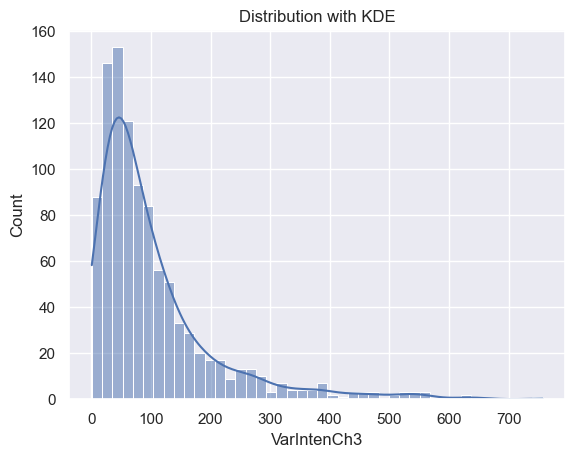

In [39]:
# Visualize the distribution of 'VarIntenCh3' using a histogram
sns.histplot(train_df['VarIntenCh3'], kde=True)
plt.title("Distribution with KDE")
plt.show()

In [57]:
def check_transform_suitability(df, save_csv=False, skew_bias=True, csv_path='transform_suitability.csv'):
    """
    UPDATE DESCRIPTION:
    Check suitability of each column for Box-Cox and Yeo-Johnson transformations,
    and report missing value stats.
    
    Parameters:
    - df: pandas DataFrame
    - save_csv: bool, whether to save the summary dataframe to a csv file (default False)
    - skew_bias: bool, whether to apply bias correction in skewness calculation (default True)
    - csv_path: str, path to save the csv file if save_csv=True
    
    Returns:
    - summary_df: DataFrame with columns ['Column', 'Data Type', 'Box-Cox Applicable', 'Yeo-Johnson Applicable', 'Has NaNs', 'NaN Count', 'NaN %']
    - boxcox_cols: list of columns suitable for Box-Cox
    - yeojohnson_cols: list of columns suitable for Yeo-Johnson
    """
    
    summary_list = []
    
    for col in df.columns:
        dtype = df[col].dtype
        
        # Initializations
        skew_value = None
        boxcox_applicable = False
        yeojohnson_applicable = False
        
        if pd.api.types.is_numeric_dtype(dtype):
            col_data = df[col].dropna() # 
            skew_value = skew(col_data, bias=skew_bias)  # Calculate skewness
            # Box-Cox requires all values > 0
            if (col_data > 0).all():
                boxcox_applicable = True
            # Yeo-Johnson works for all numeric (including 0 and negatives)
            yeojohnson_applicable = True

        # Missing values info
        nan_count = df[col].isna().sum()
        has_nans = "Yes" if nan_count > 0 else "No"
        nan_percent = (nan_count / len(df)) * 100
        
        summary_list.append({
            'Column': col,
            'Data Type': str(dtype),
            'Skewness': skew_value,
            'Apply Transformation': (abs(skew_value) > 0.5) if skew_value is not None else False,
            'Box-Cox Applicable': boxcox_applicable,
            'Yeo-Johnson Applicable': yeojohnson_applicable,
            'NaN Count': nan_count,
            'NaN %': f"{nan_percent:.2f}%"
        })
    
    summary_df = pd.DataFrame(summary_list)
    
    # Purely nice-to-have for later analysis
    boxcox_cols = summary_df[summary_df['Box-Cox Applicable']]['Column'].tolist()
    yeojohnson_cols = summary_df[summary_df['Yeo-Johnson Applicable']]['Column'].tolist()
    
    if save_csv:
        summary_df.to_csv(csv_path, index=False)
        print(f"Summary saved to {csv_path}")
    
    return summary_df, boxcox_cols, yeojohnson_cols

def selective_transform(df, summary_df):
    """
    CONSIDER ADDING CENTERING AND FOR CONSITENCY'S SAKE
    Transform columns in df if 'Apply Transformation' in summary_df is True.
    Use Box-Cox if applicable, otherwise Yeo-Johnson. Only numeric columns are transformed.
    """
    from sklearn.preprocessing import PowerTransformer

    transformed_df = df.copy()
    for _, row in summary_df.iterrows():
        col = row['Column']
        apply = row['Apply Transformation']
        boxcox_ok = row['Box-Cox Applicable']
        yeojohnson_ok = row['Yeo-Johnson Applicable']
        dtype = df[col].dtype

        # Only transform if flagged, applicable, and numeric
        if pd.api.types.is_numeric_dtype(dtype):
            data = df[col].values.reshape(-1, 1)
            if boxcox_ok and apply:
                pt = PowerTransformer(method='box-cox')
                transformed_df[col] = pt.fit_transform(data)
            elif yeojohnson_ok and apply:
                pt = PowerTransformer(method='yeo-johnson')
                transformed_df[col] = pt.fit_transform(data)
            else:
                # Center and scale for the remaining columns
                transformed_df[col] = (data - np.mean(data)) / np.std(data)
            # If neither applicable, skip

    return transformed_df


In [58]:
# The original data contains "status" columns that are binary versions of the predictors.
# We remove these before applying the transformation functions defined above.
train_df = train_df[[col for col in train_df.columns if "Status" not in col]]

# Apply transformation suitability check
summary_df, boxcox_cols, yeojohnson_cols = check_transform_suitability(train_df, save_csv=True)
summary_df.head()  # Preview the summary DataFrame

Summary saved to transform_suitability.csv


,Column,Data Type,Skewness,Apply Transformation,Box-Cox Applicable,Yeo-Johnson Applicable,NaN Count,NaN %
0,AngleCh1,float64,-0.024299,False,True,True,0,0.00%
1,AreaCh1,int32,3.530354,True,True,True,0,0.00%
2,AvgIntenCh1,float64,2.963590,True,True,True,0,0.00%
3,AvgIntenCh2,float64,0.849423,True,False,True,0,0.00%
4,AvgIntenCh3,float64,2.205620,True,True,True,0,0.00%


In [59]:
# Apply selective transformation based on the summary DataFrame
train_df_trans = selective_transform(train_df, summary_df)

In [60]:
train_df_trans.info()  # Check the info of the transformed DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 1 to 2018
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AngleCh1                 1009 non-null   float64
 1   AreaCh1                  1009 non-null   float64
 2   AvgIntenCh1              1009 non-null   float64
 3   AvgIntenCh2              1009 non-null   float64
 4   AvgIntenCh3              1009 non-null   float64
 5   AvgIntenCh4              1009 non-null   float64
 6   ConvexHullAreaRatioCh1   1009 non-null   float64
 7   ConvexHullPerimRatioCh1  1009 non-null   float64
 8   DiffIntenDensityCh1      1009 non-null   float64
 9   DiffIntenDensityCh3      1009 non-null   float64
 10  DiffIntenDensityCh4      1009 non-null   float64
 11  EntropyIntenCh1          1009 non-null   float64
 12  EntropyIntenCh3          1009 non-null   float64
 13  EntropyIntenCh4          1009 non-null   float64
 14  EqCircDiamCh1            1009

### Create plots to visualize transformations

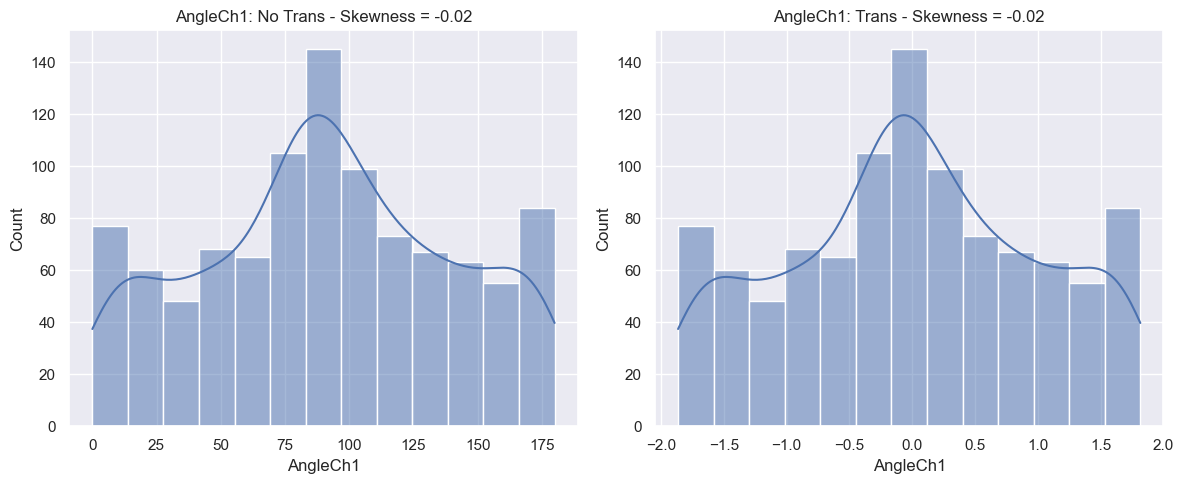

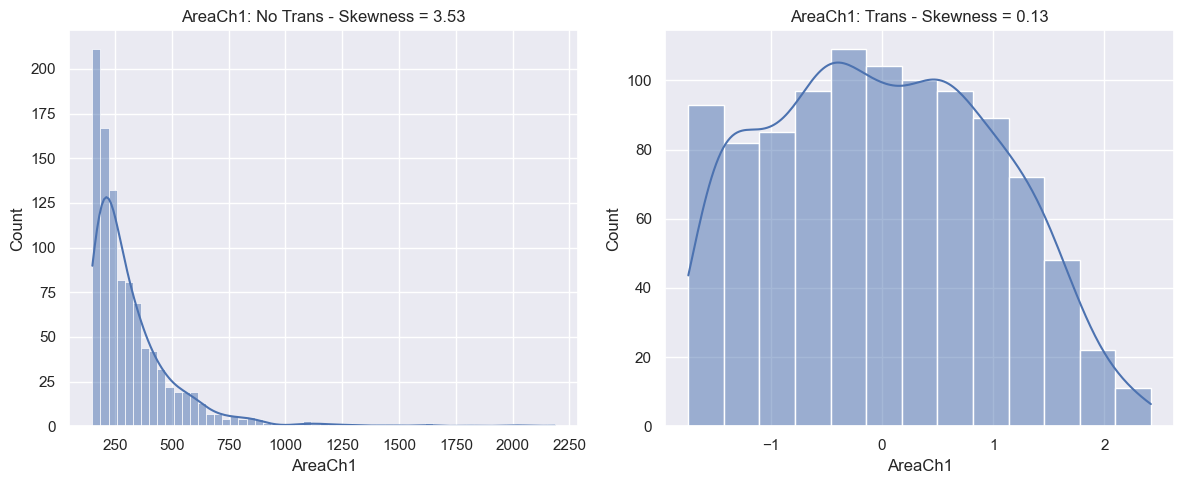

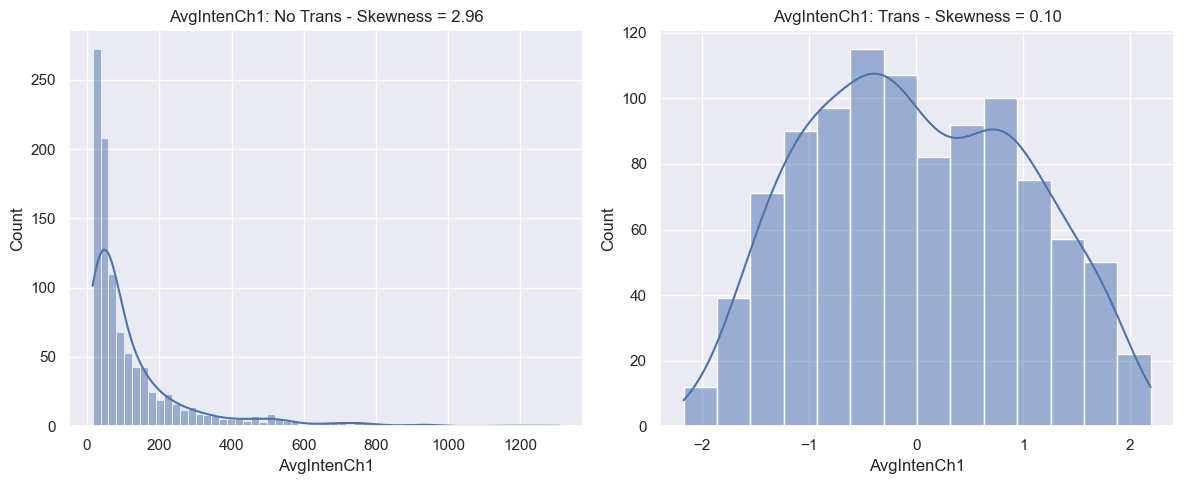

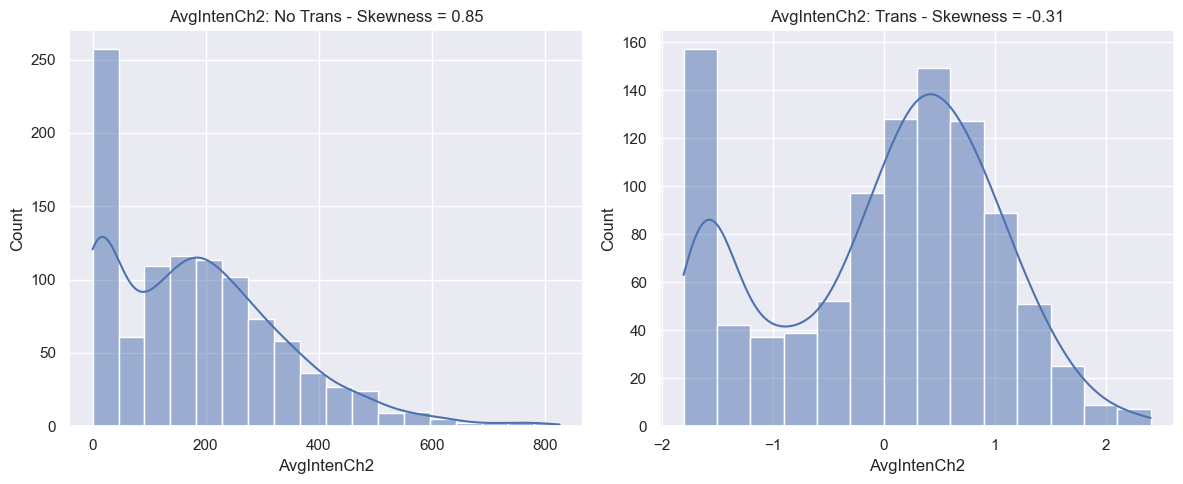

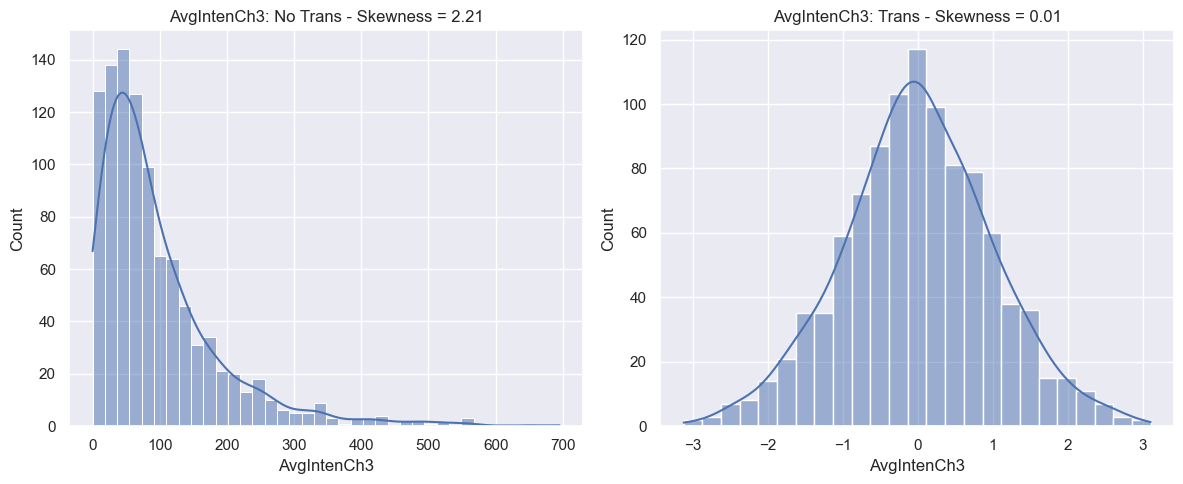

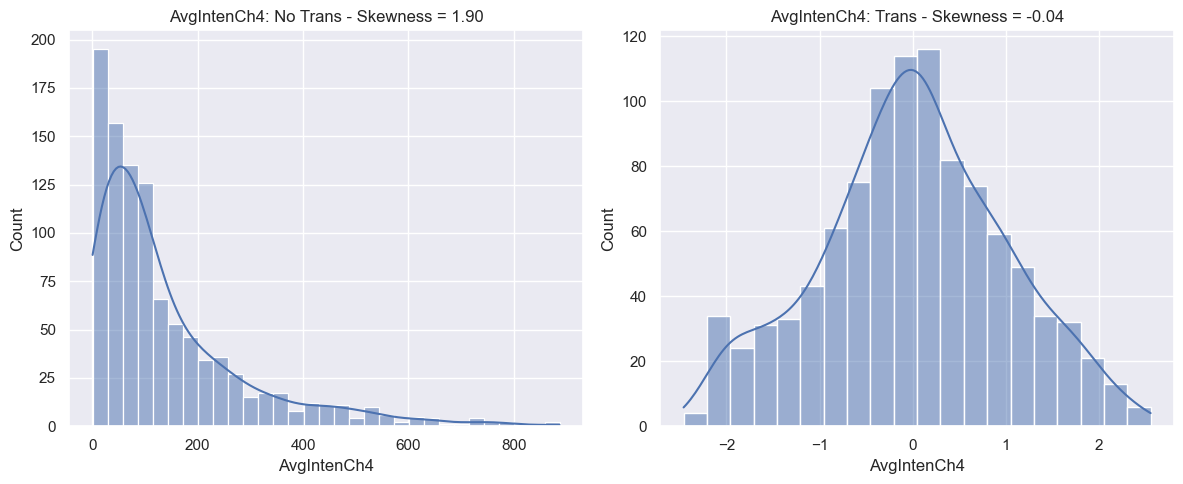

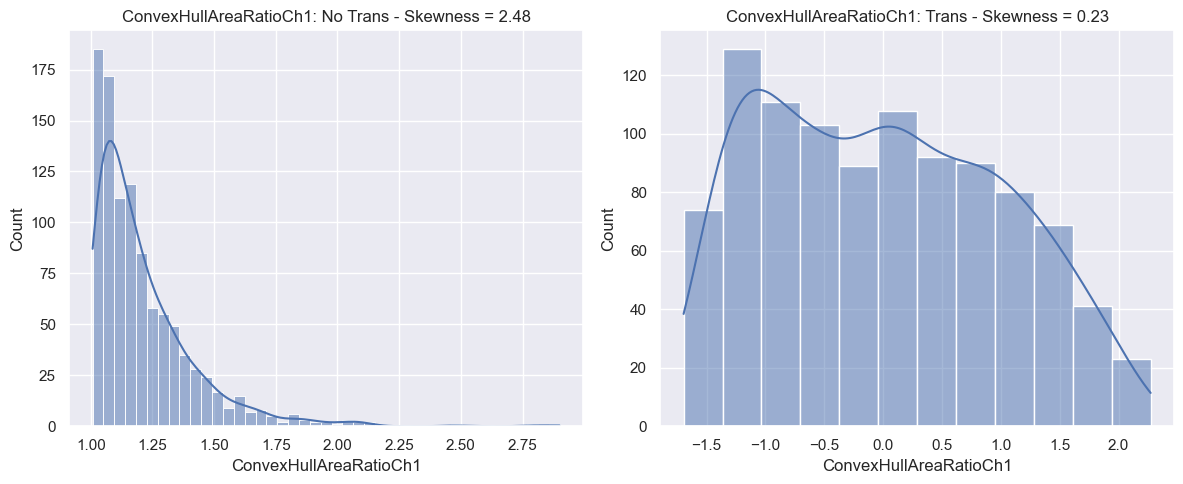

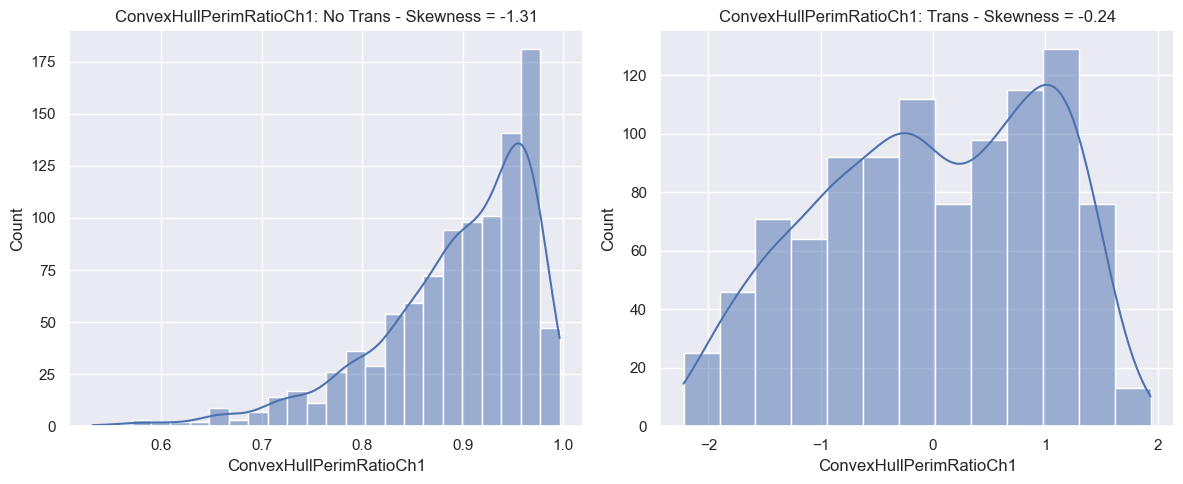

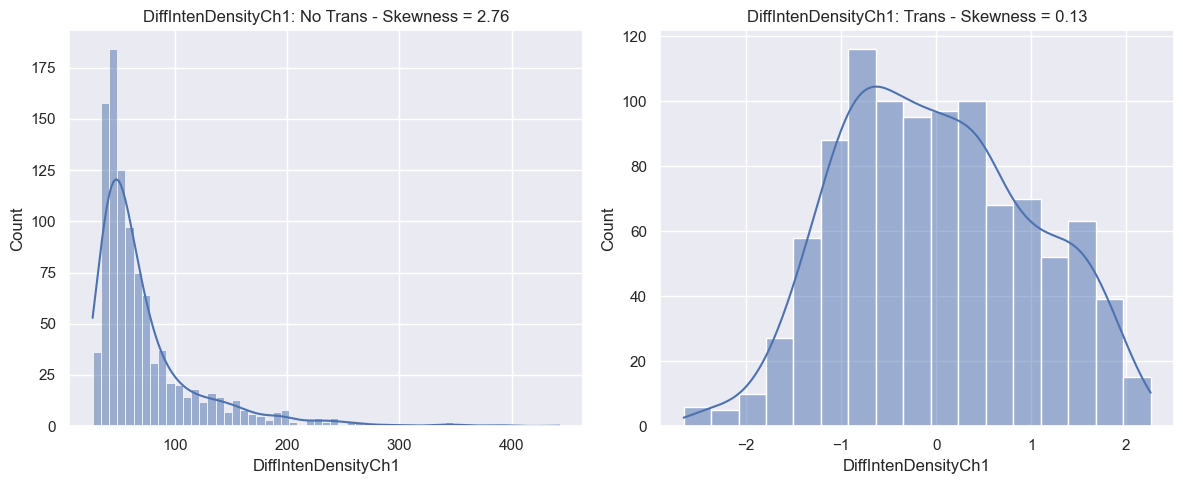

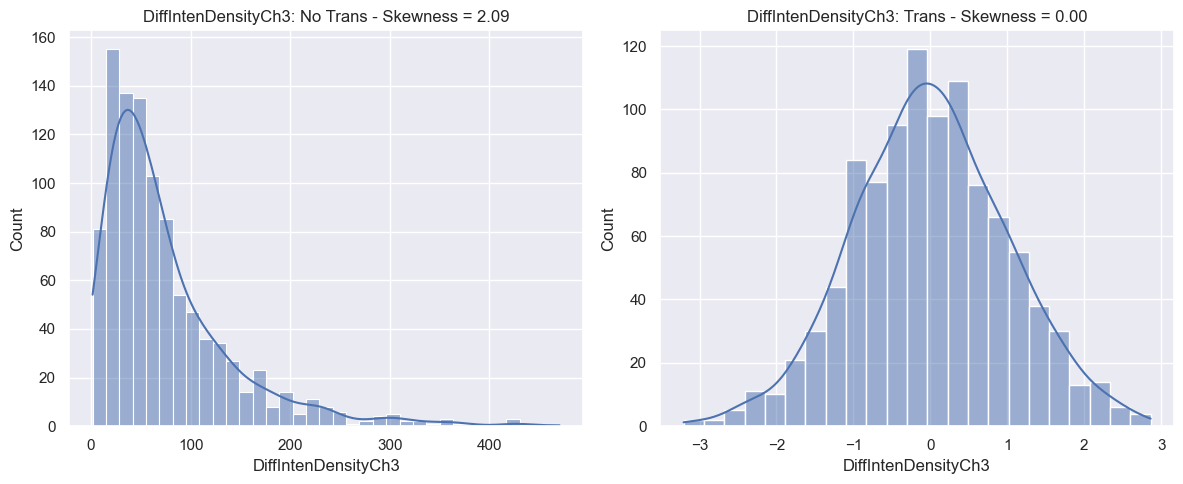

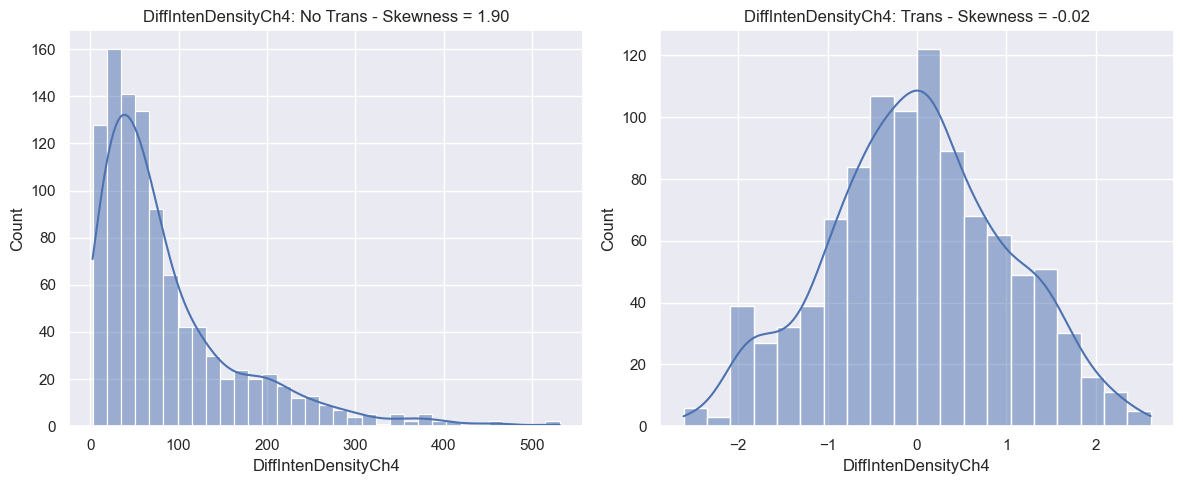

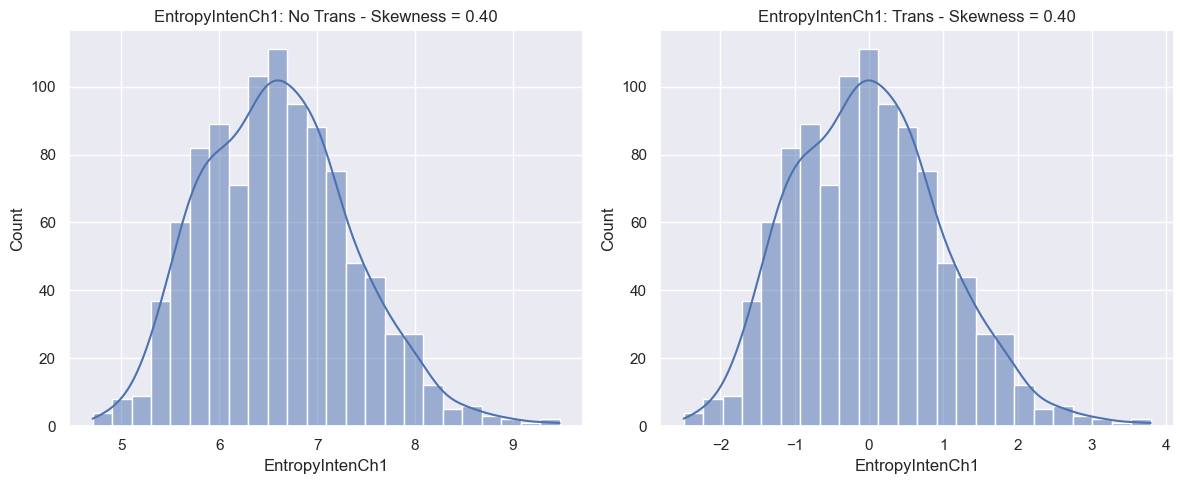

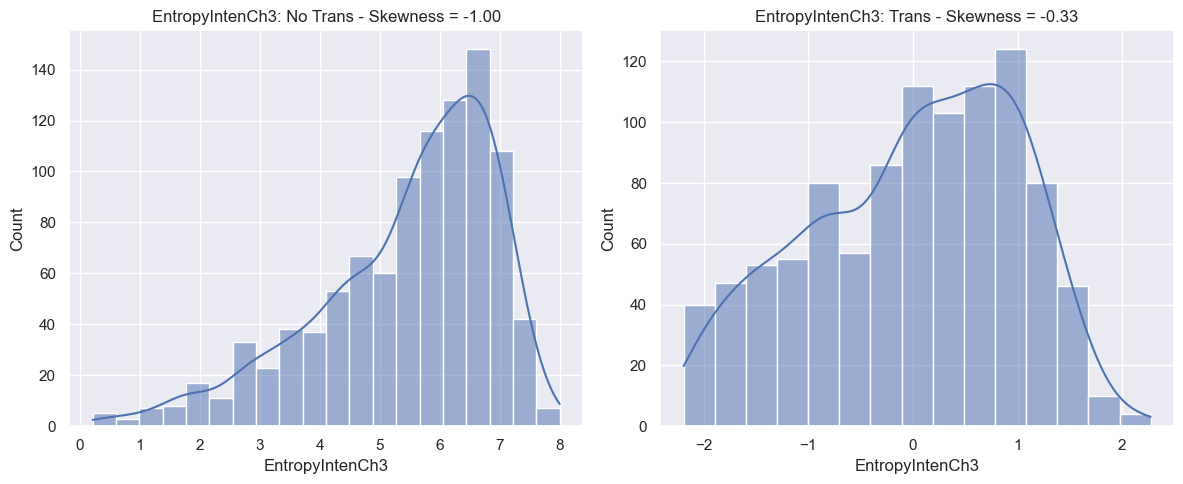

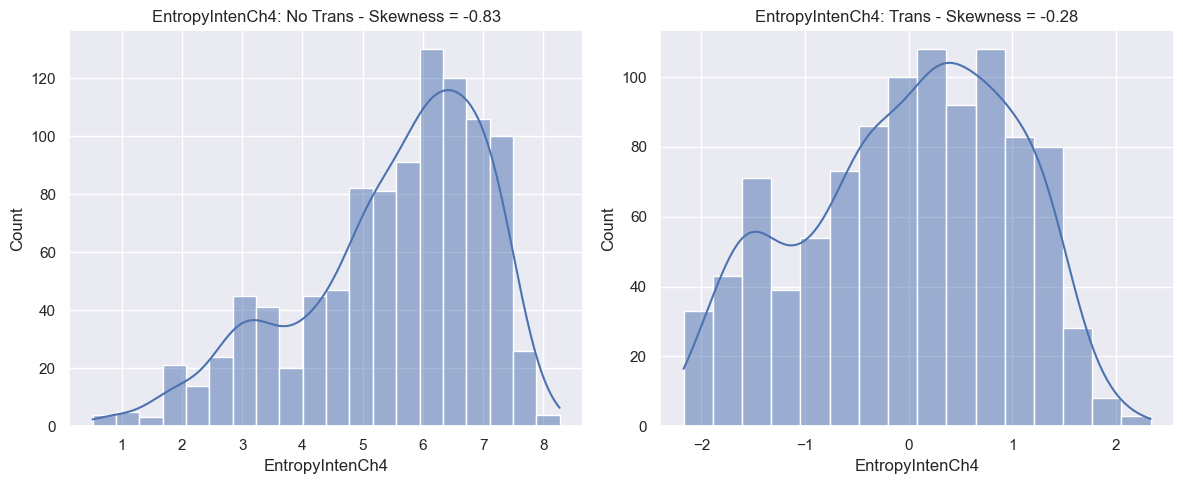

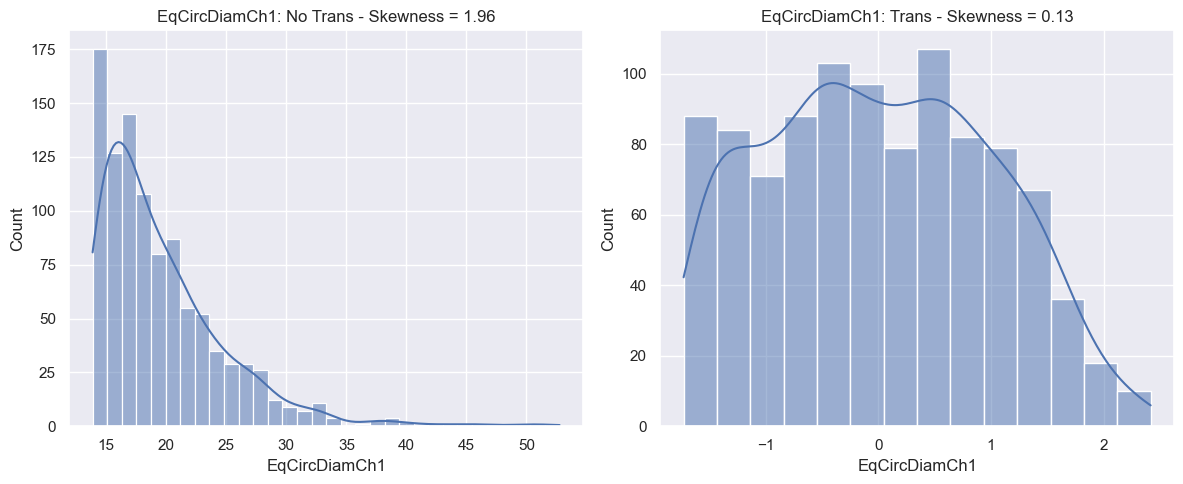

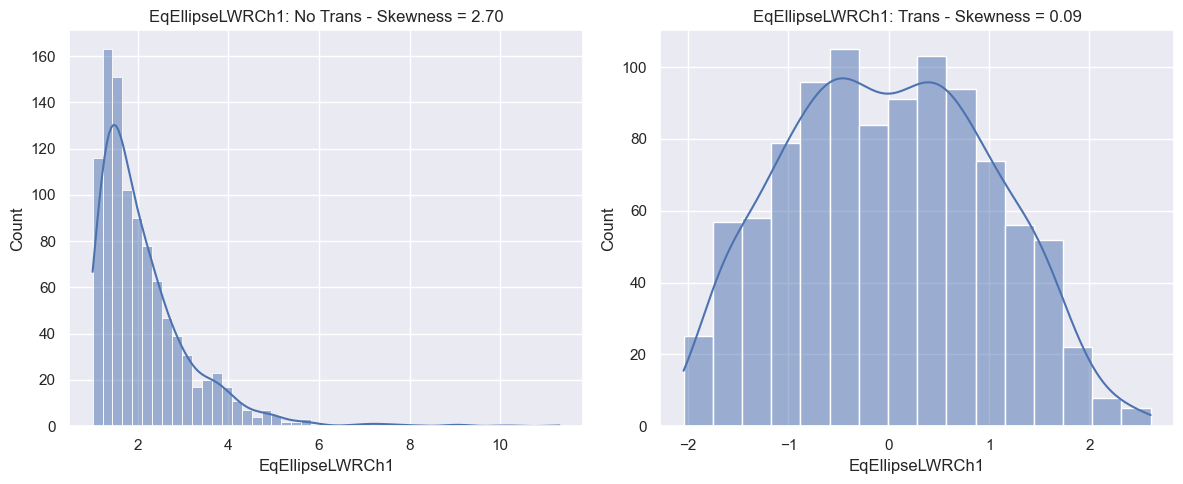

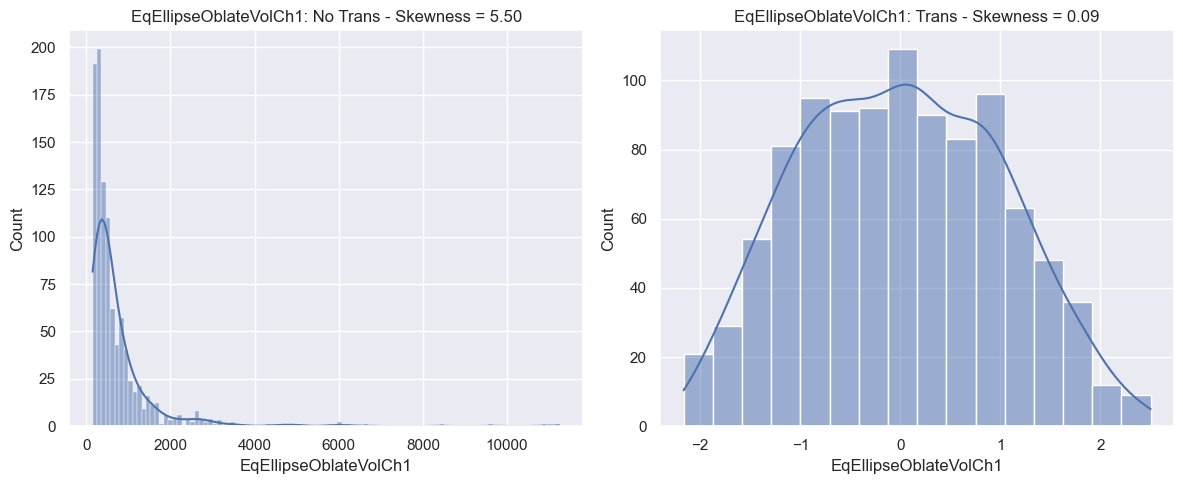

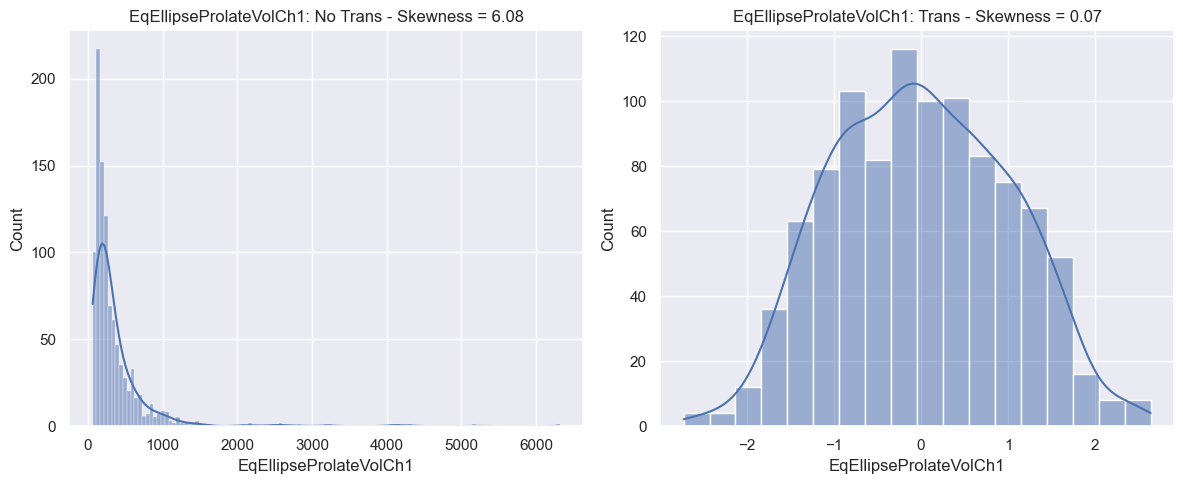

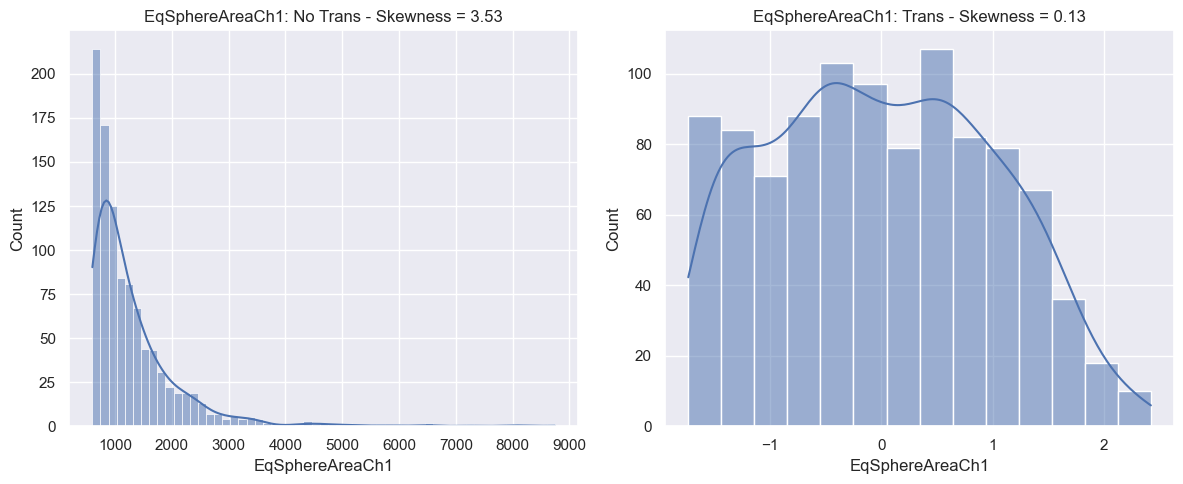

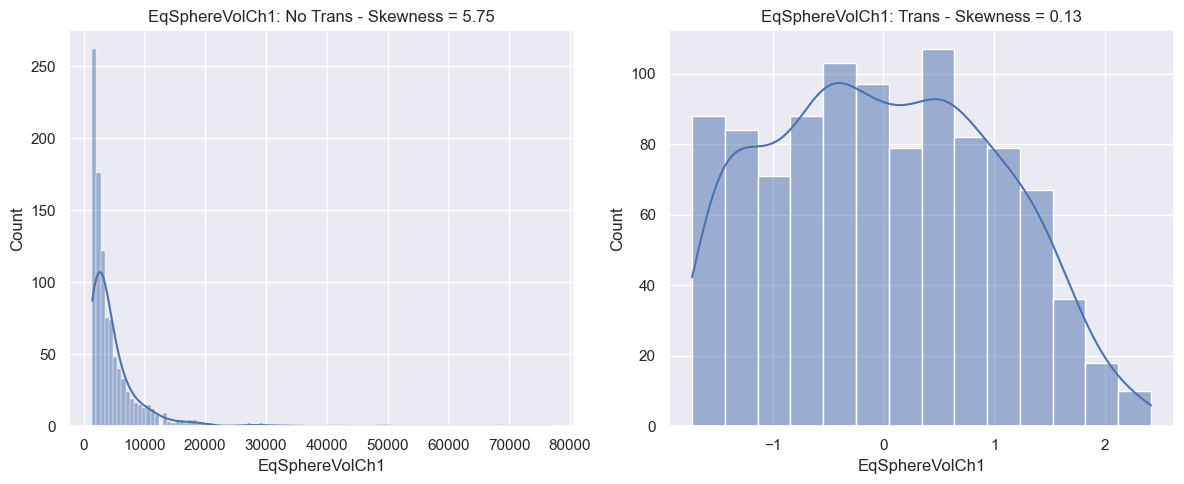

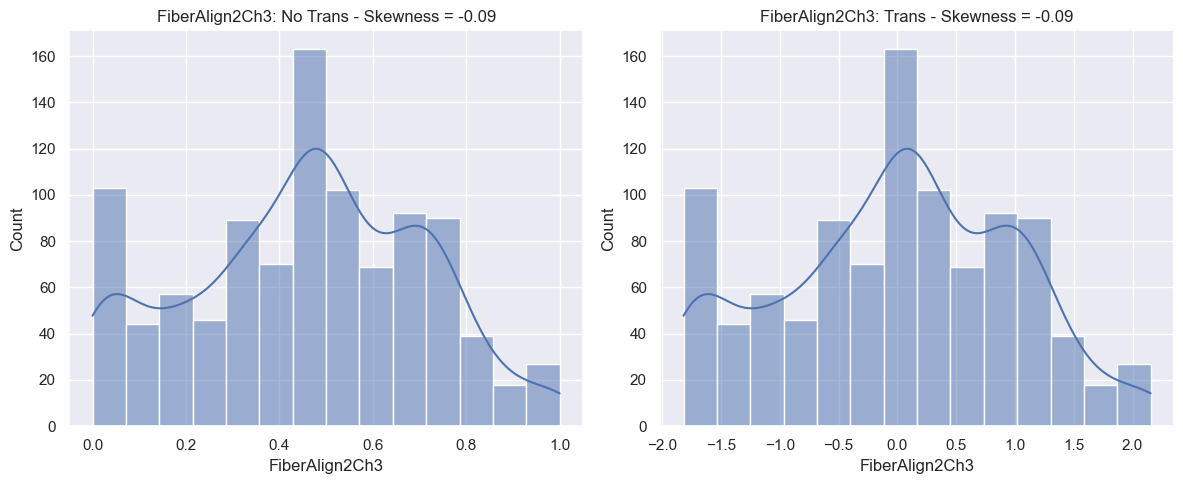

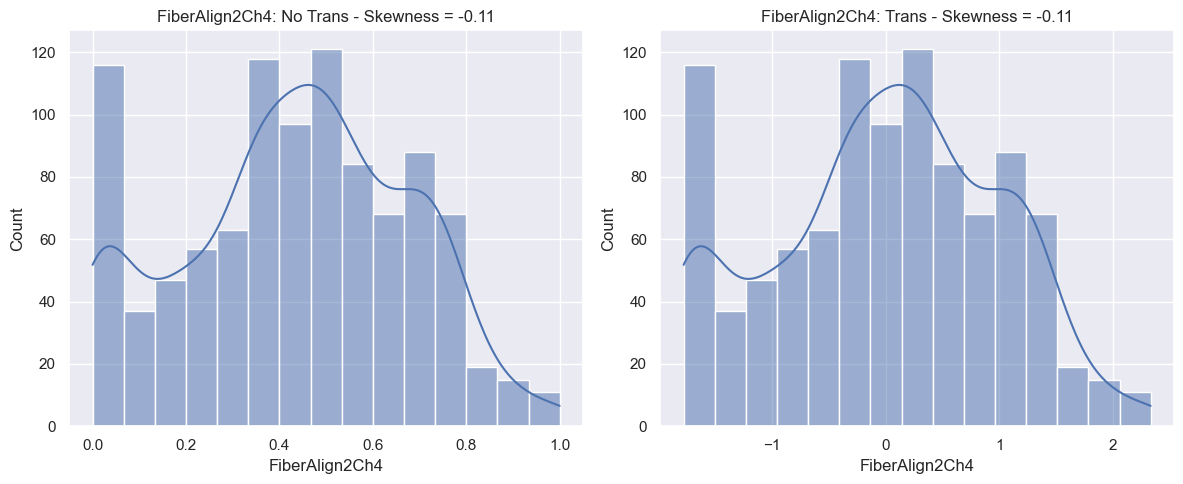

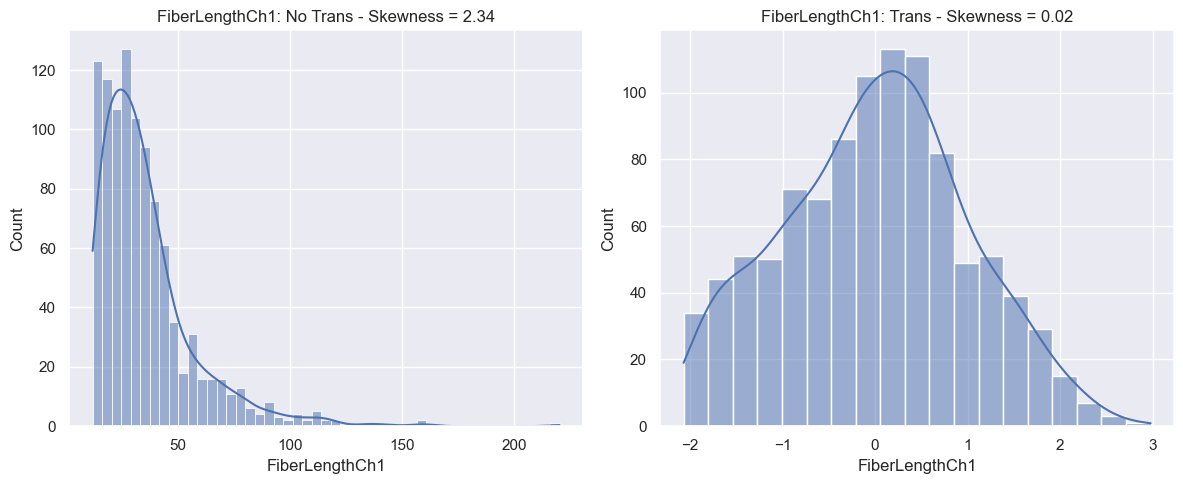

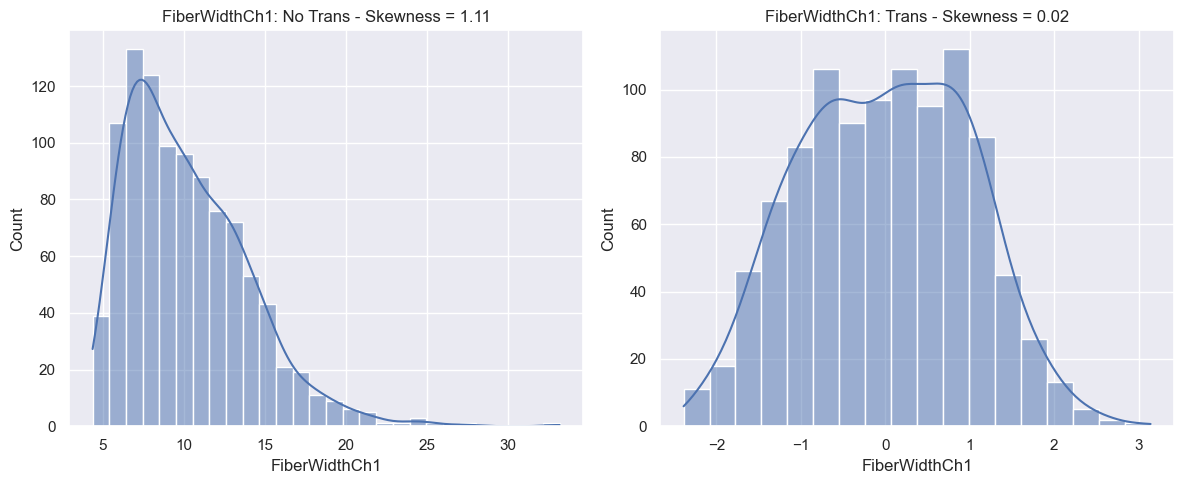

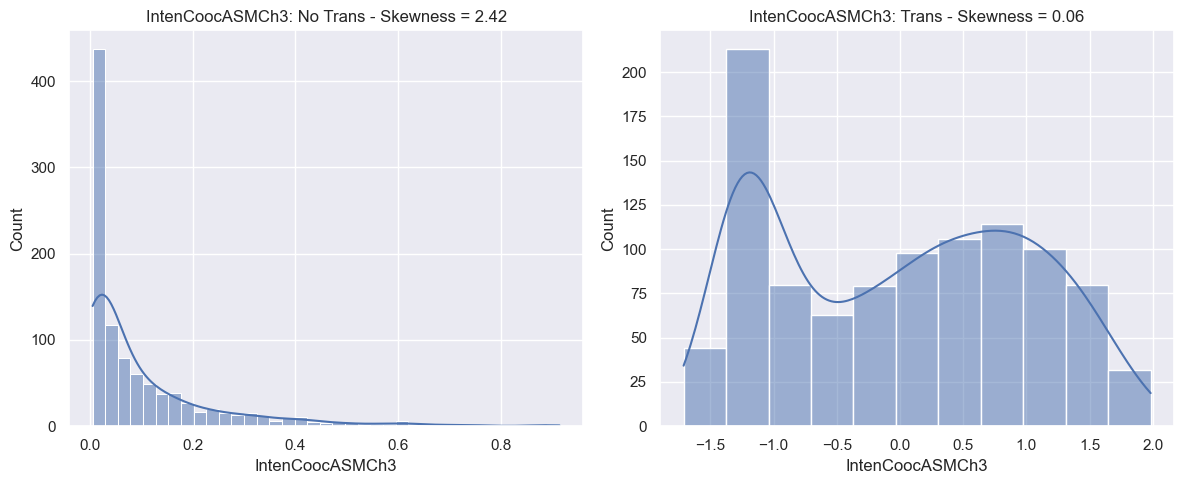

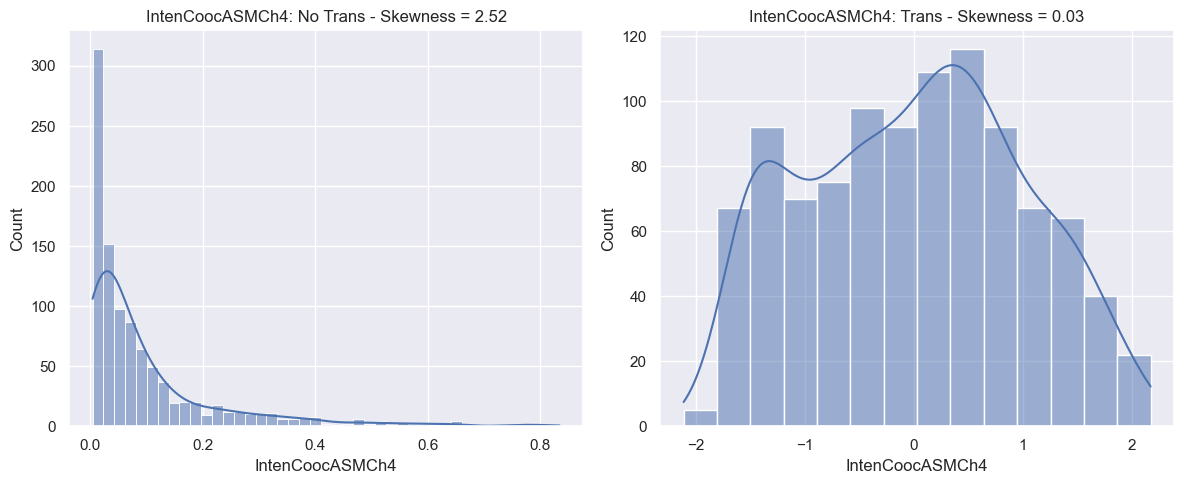

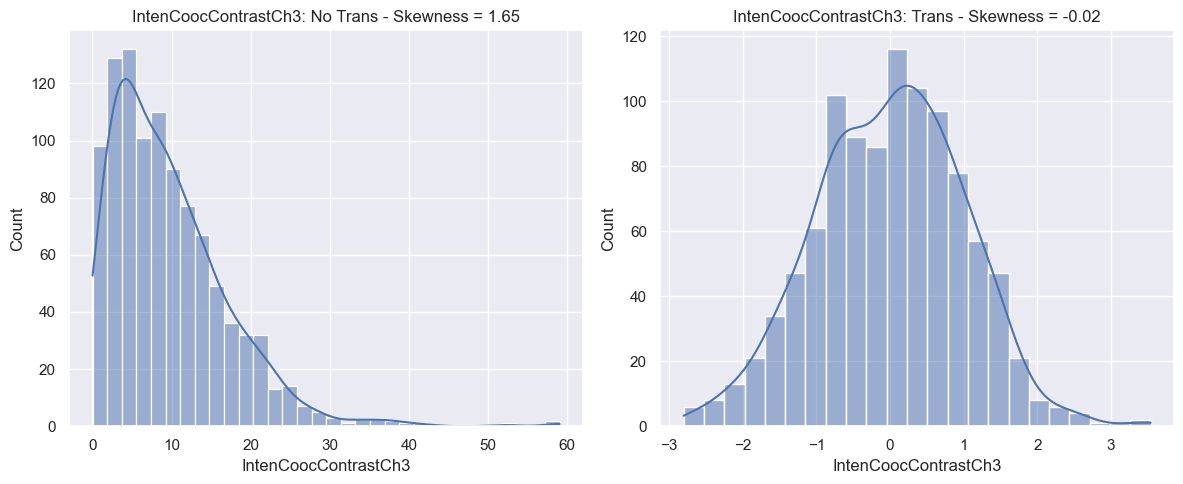

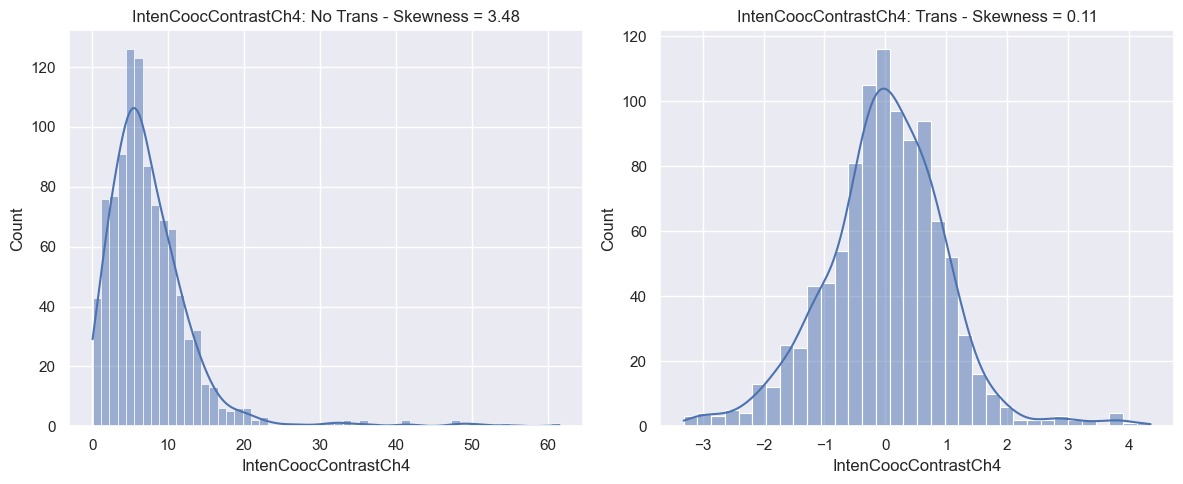

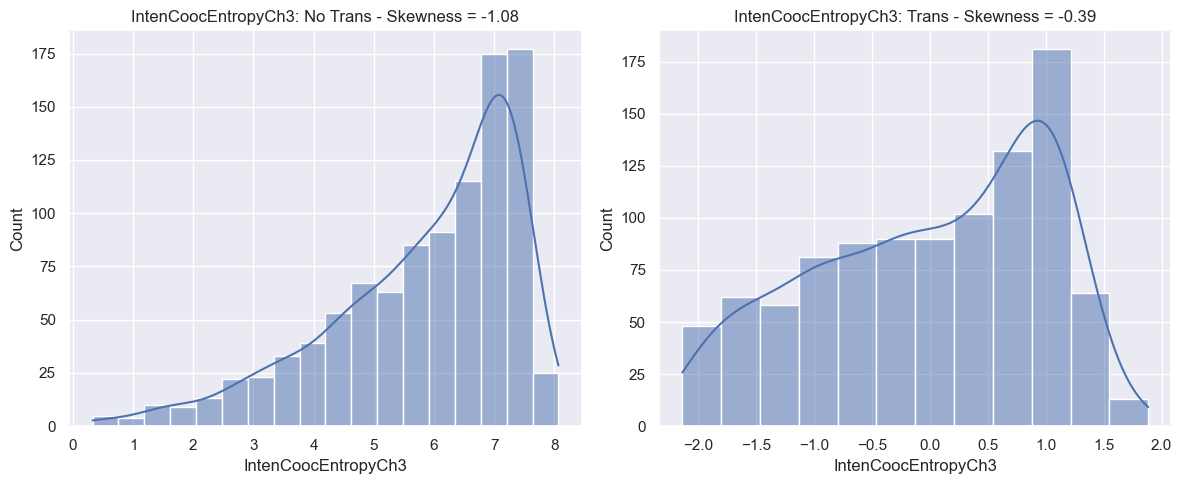

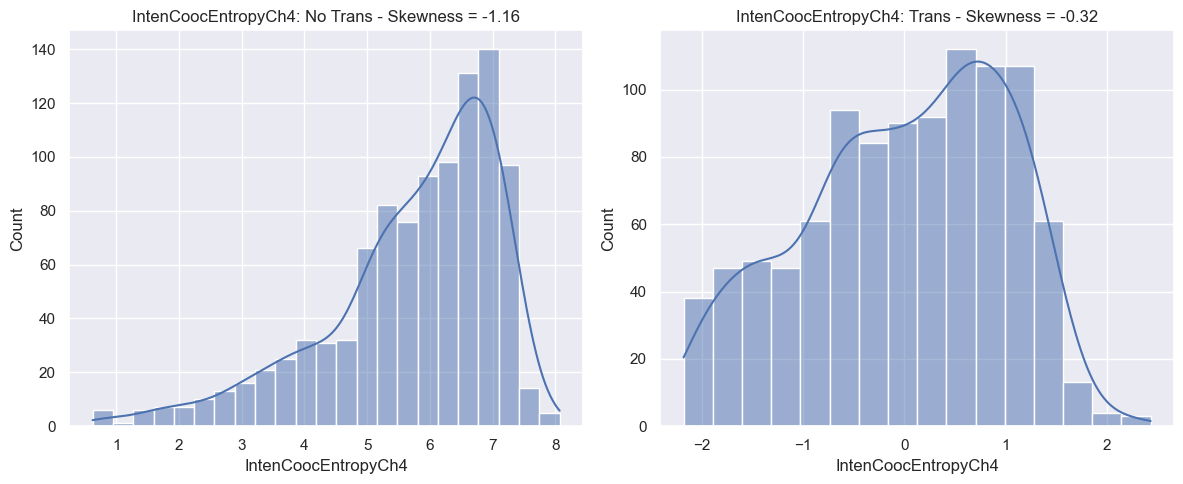

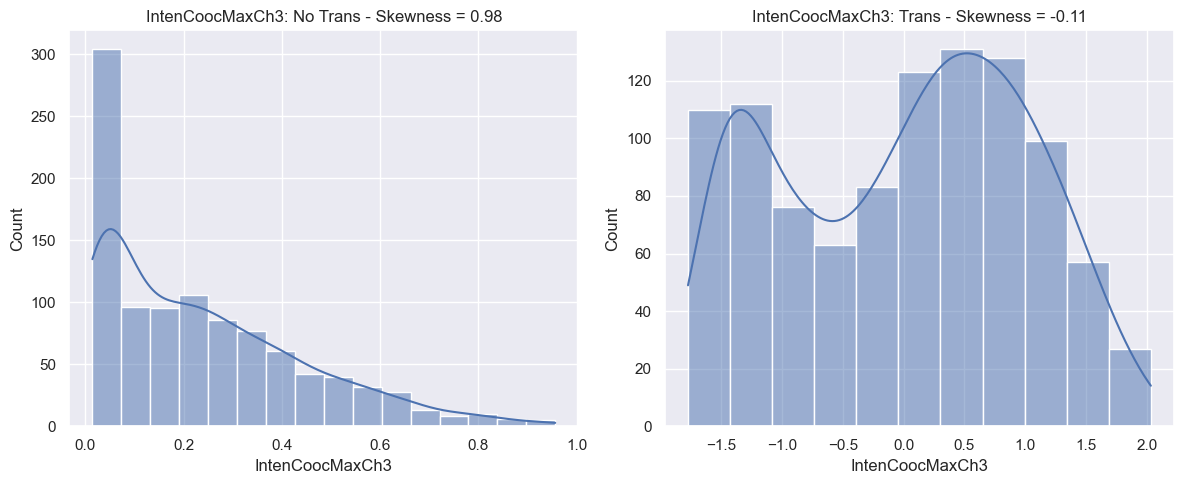

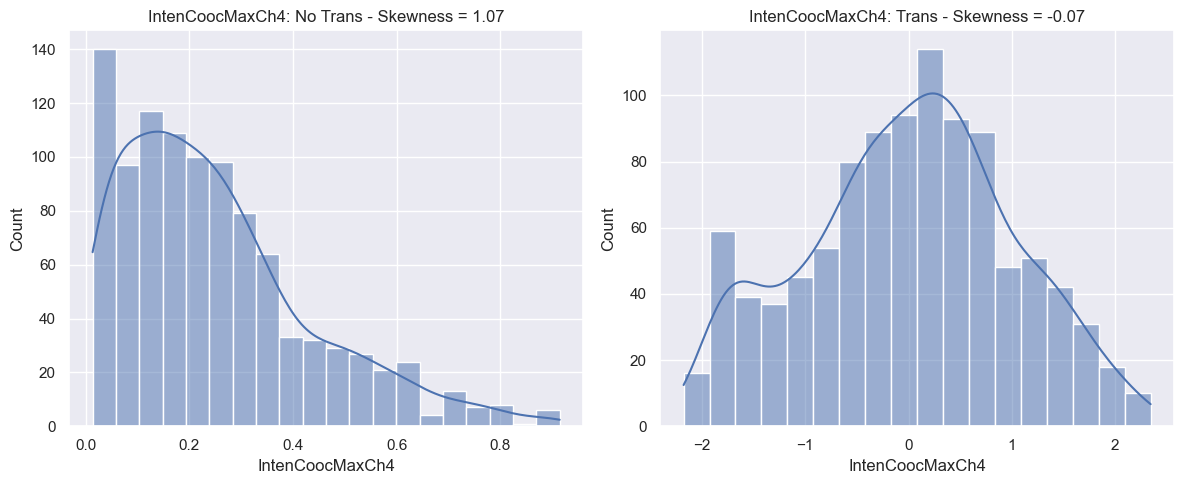

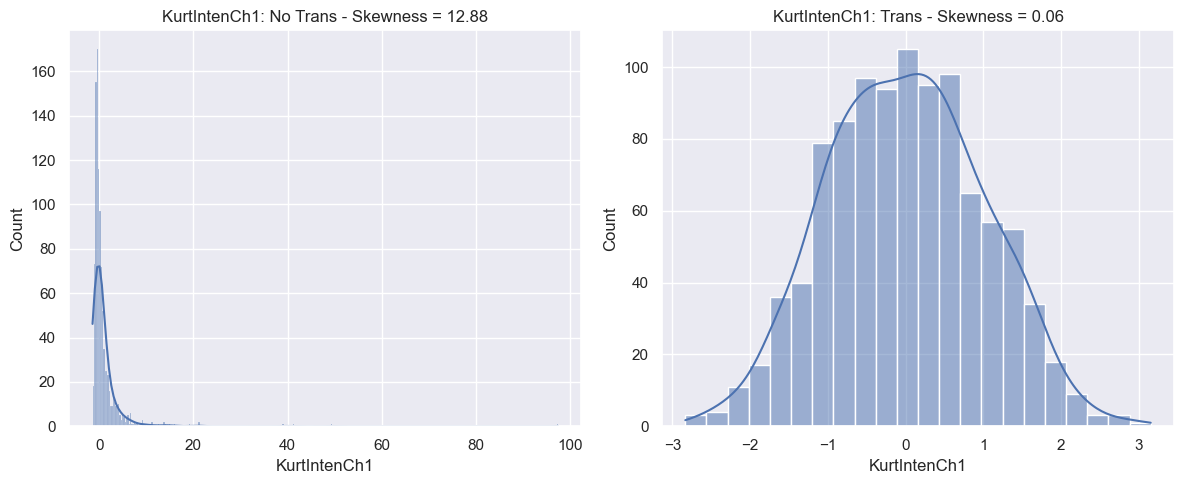

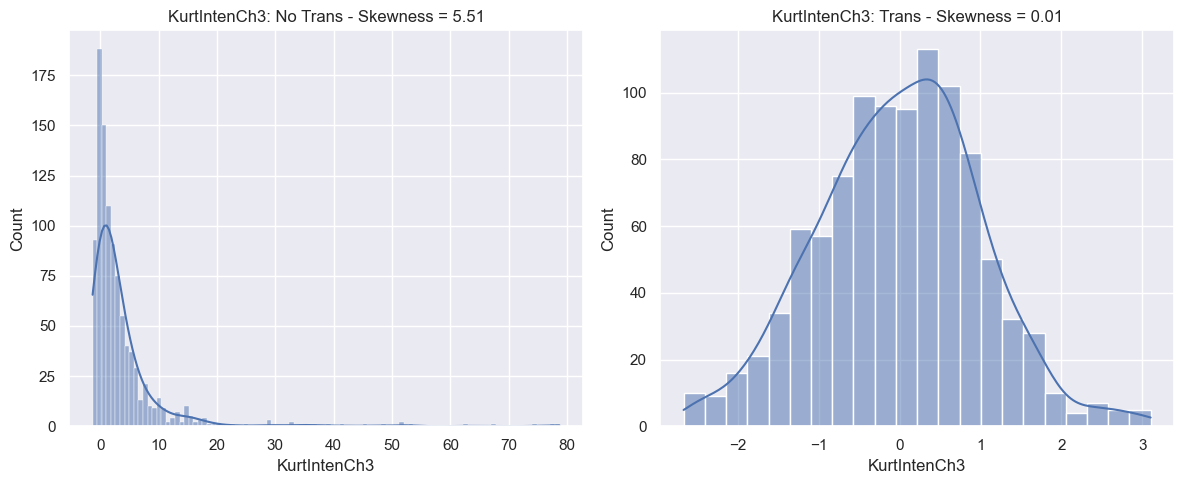

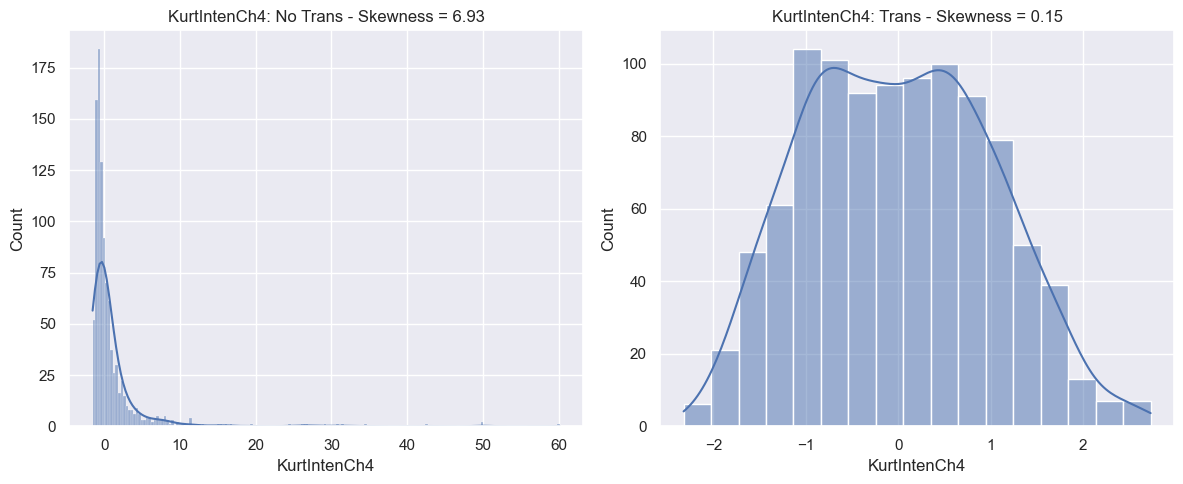

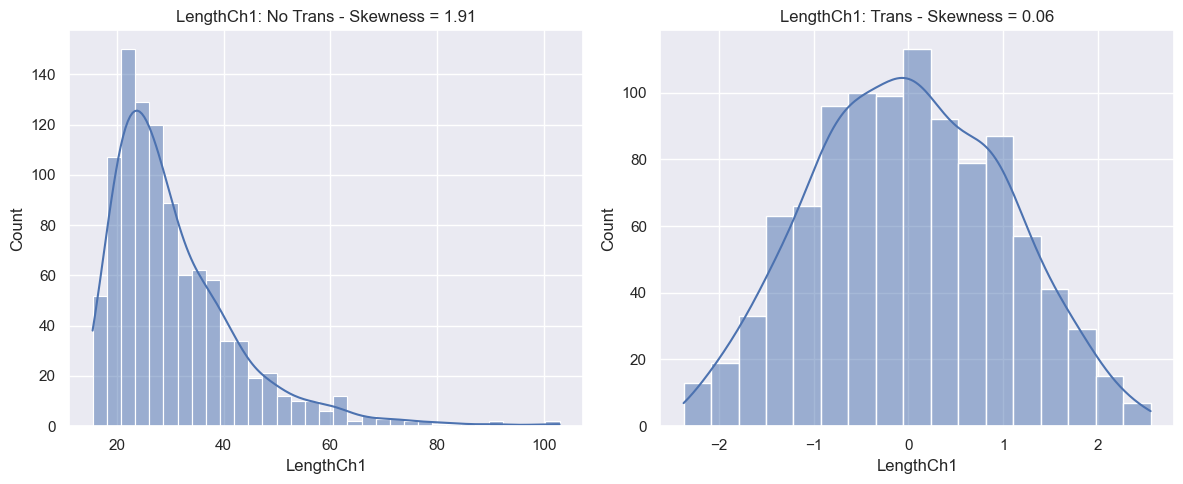

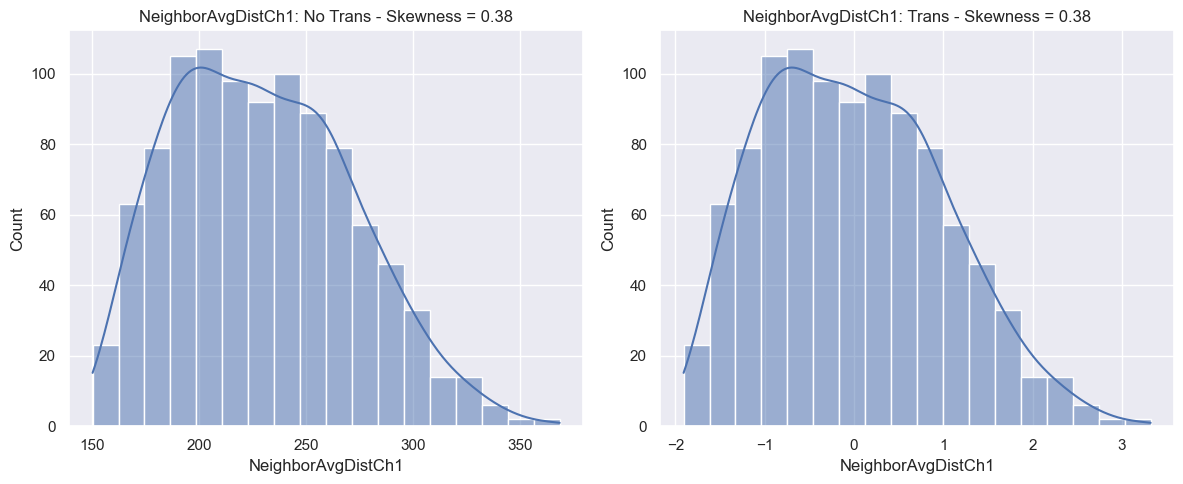

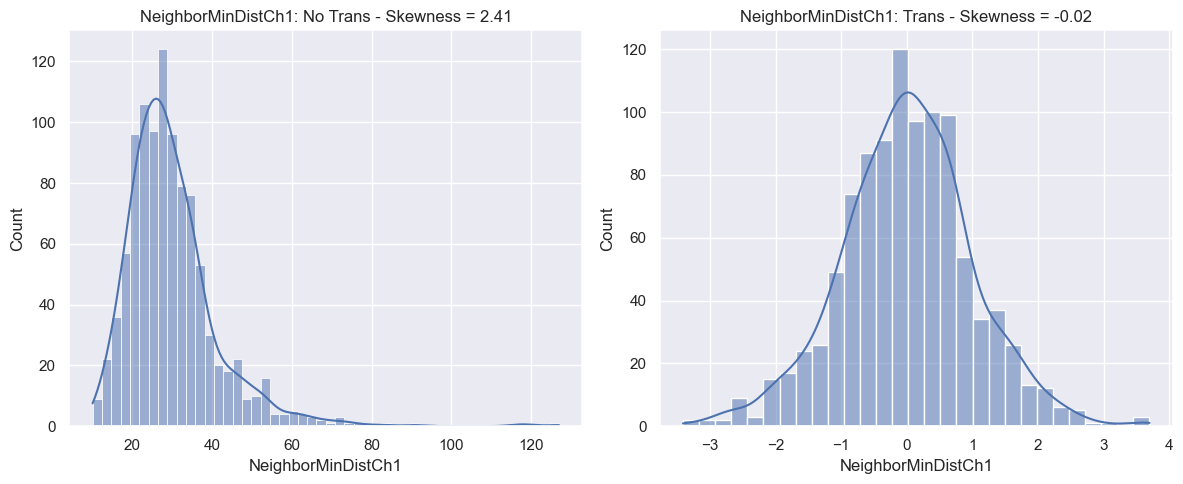

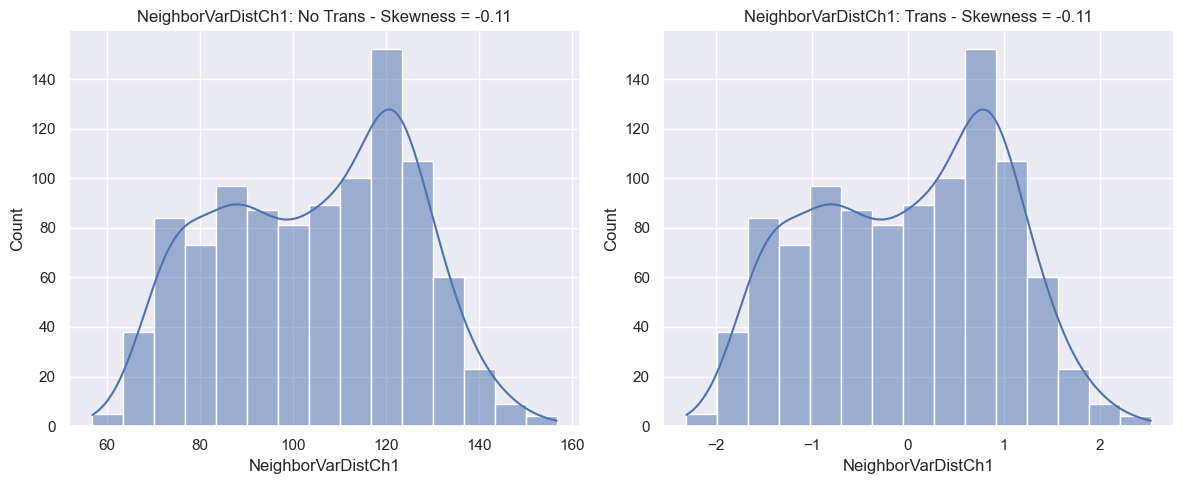

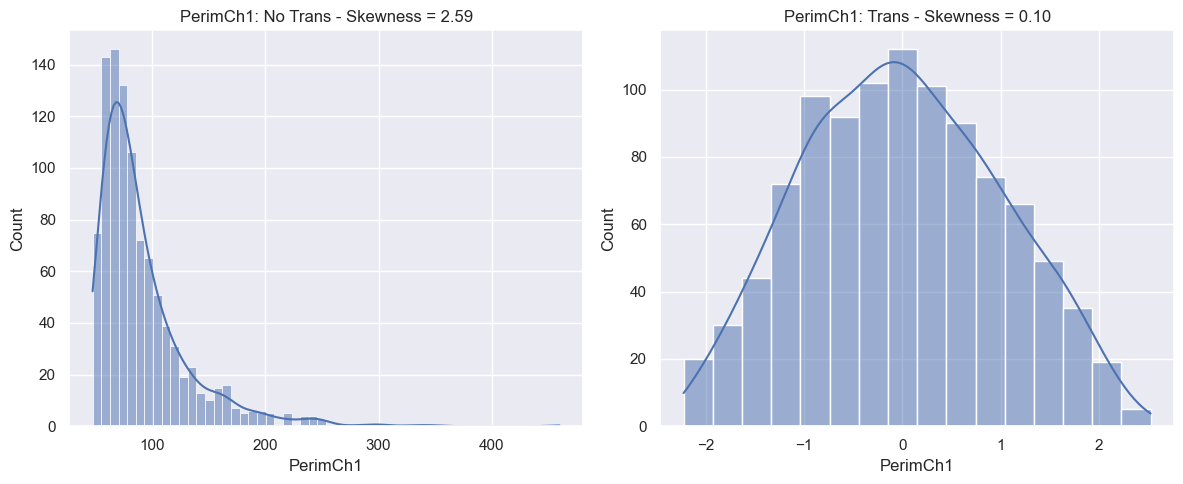

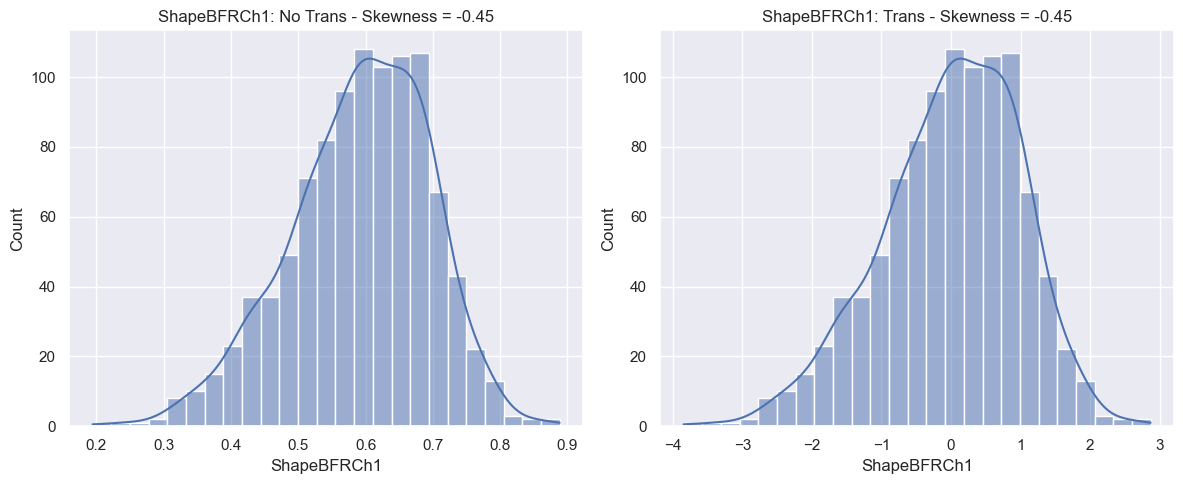

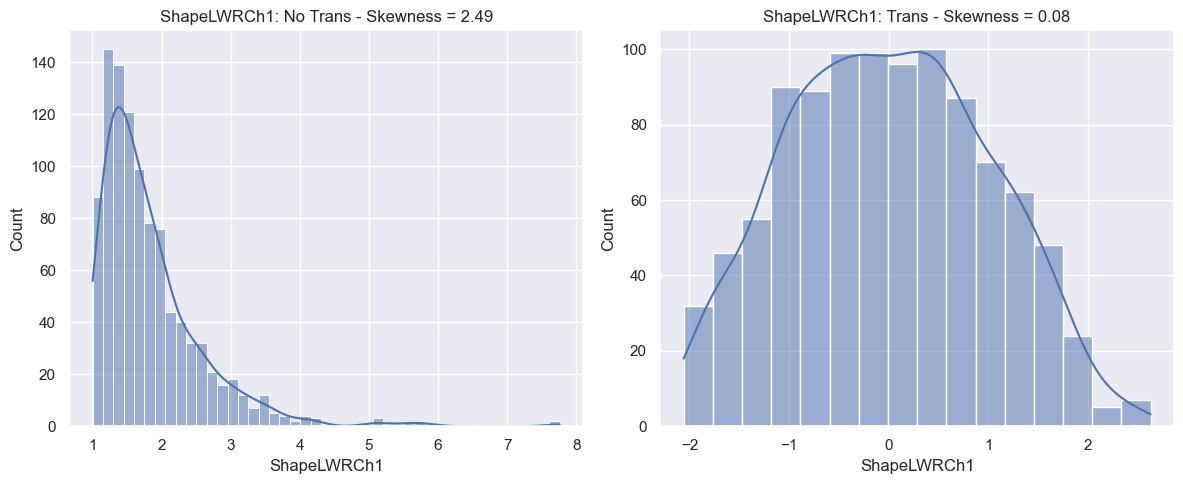

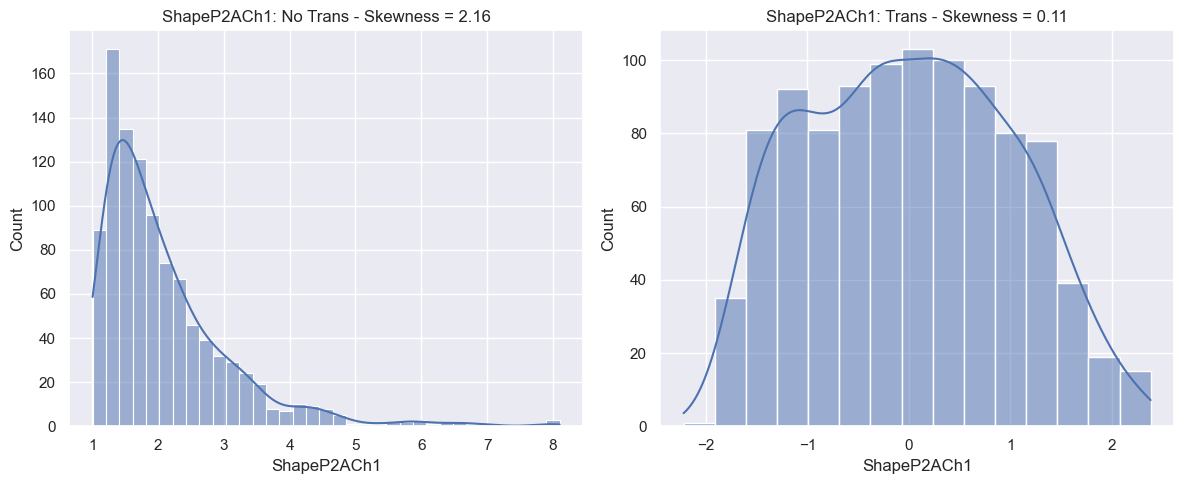

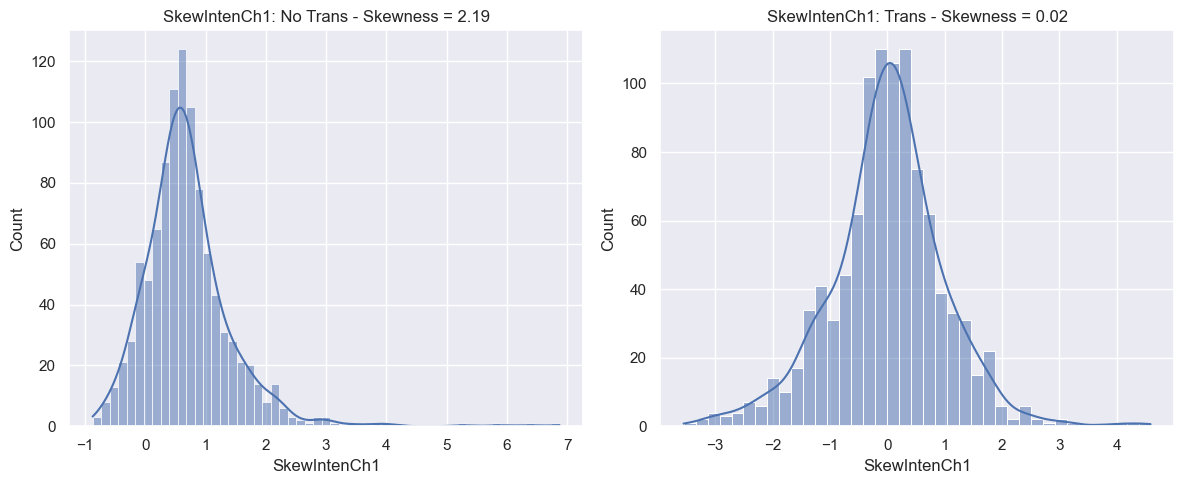

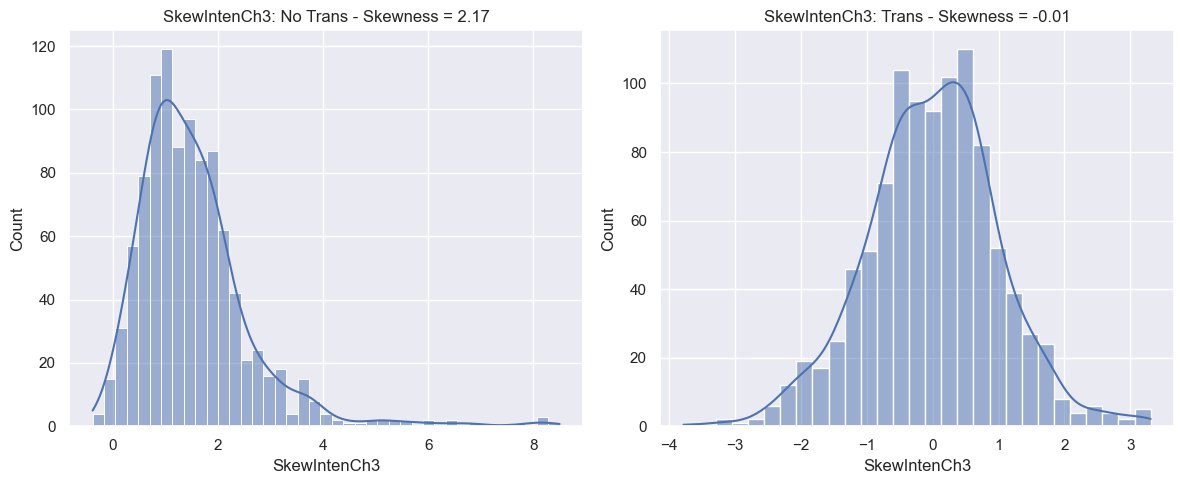

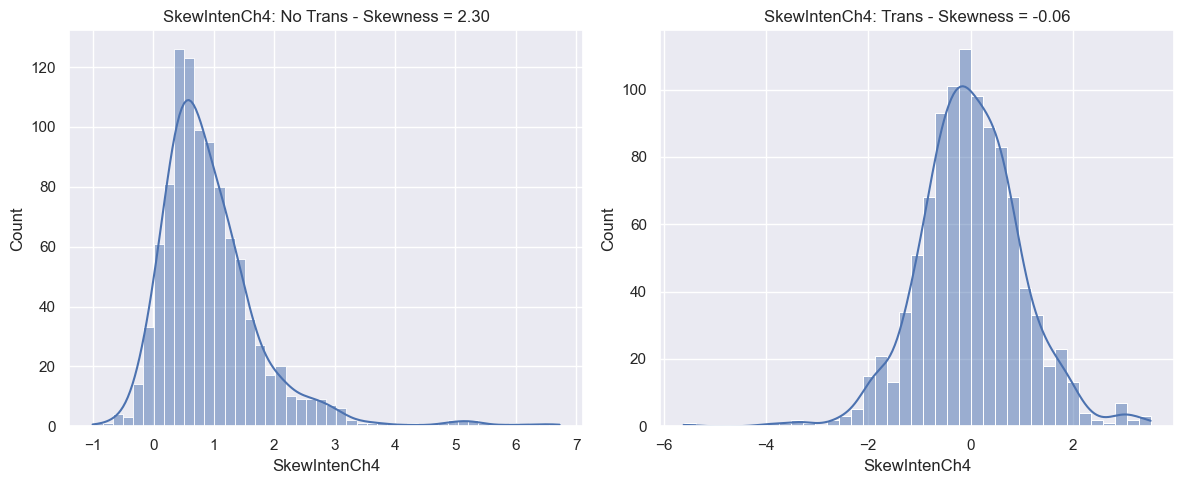

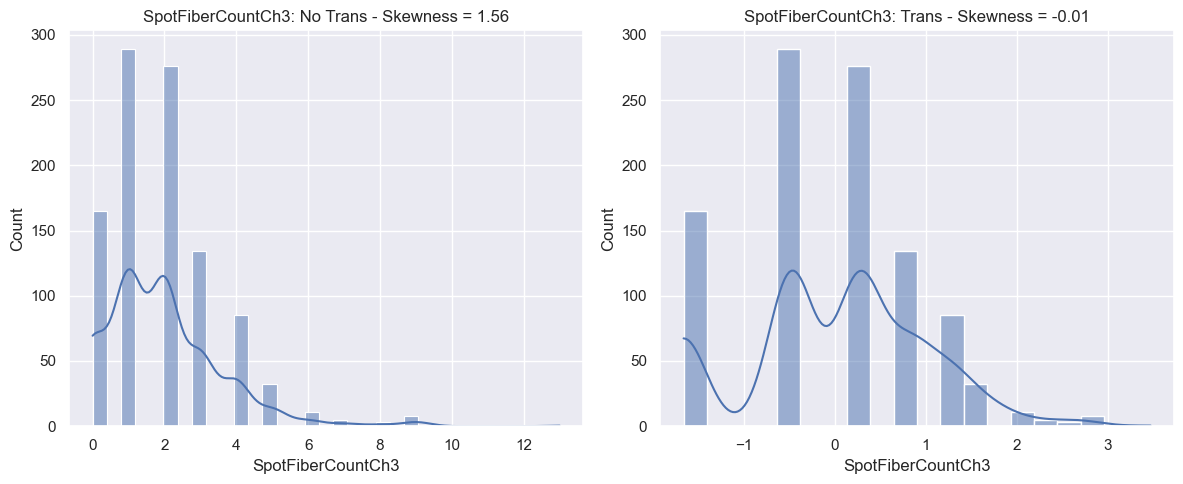

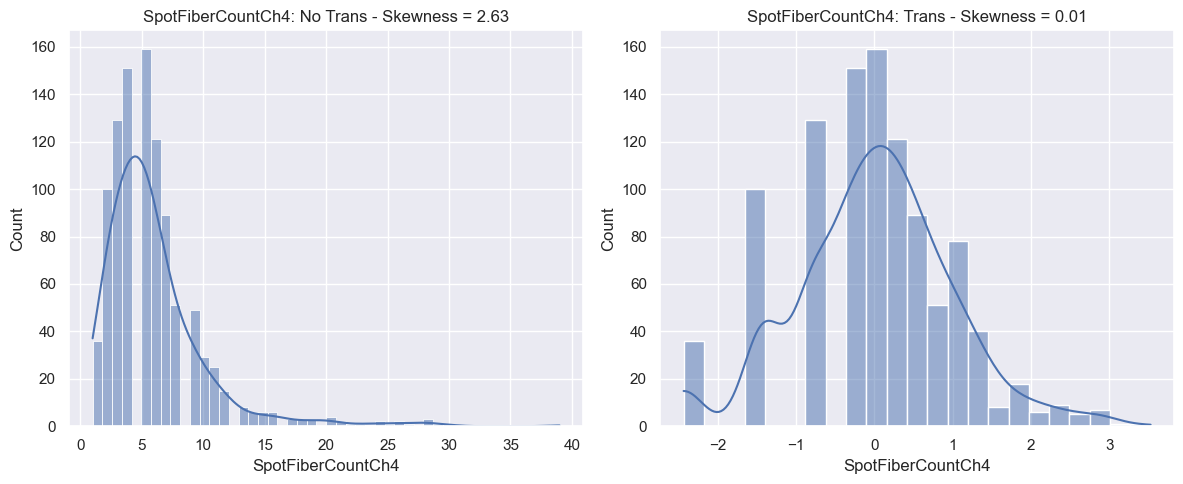

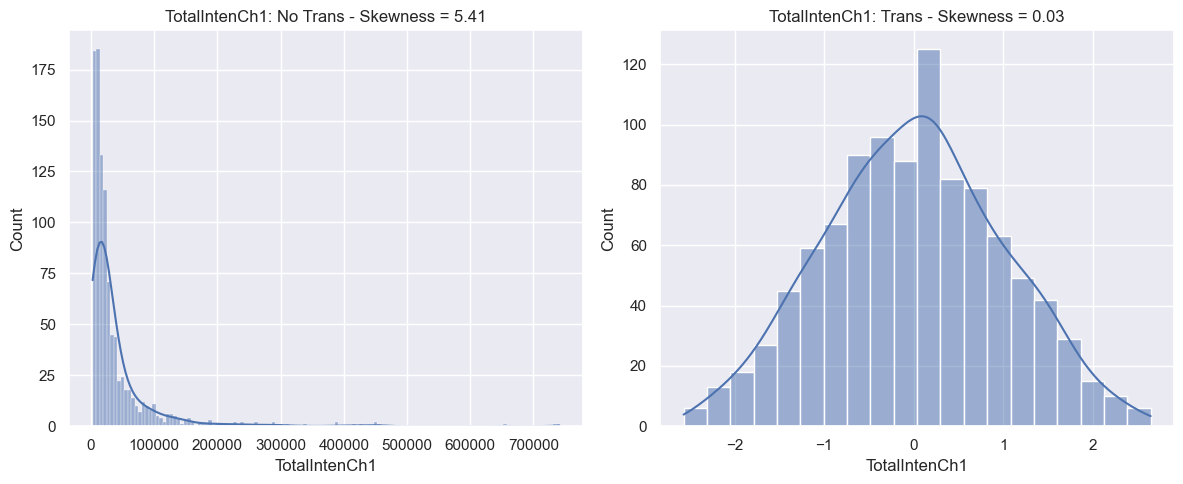

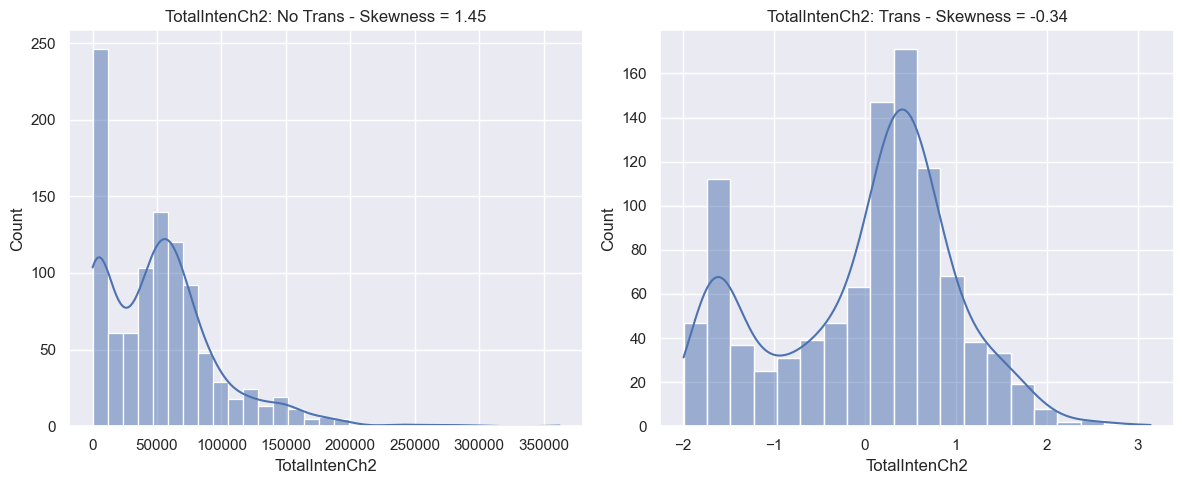

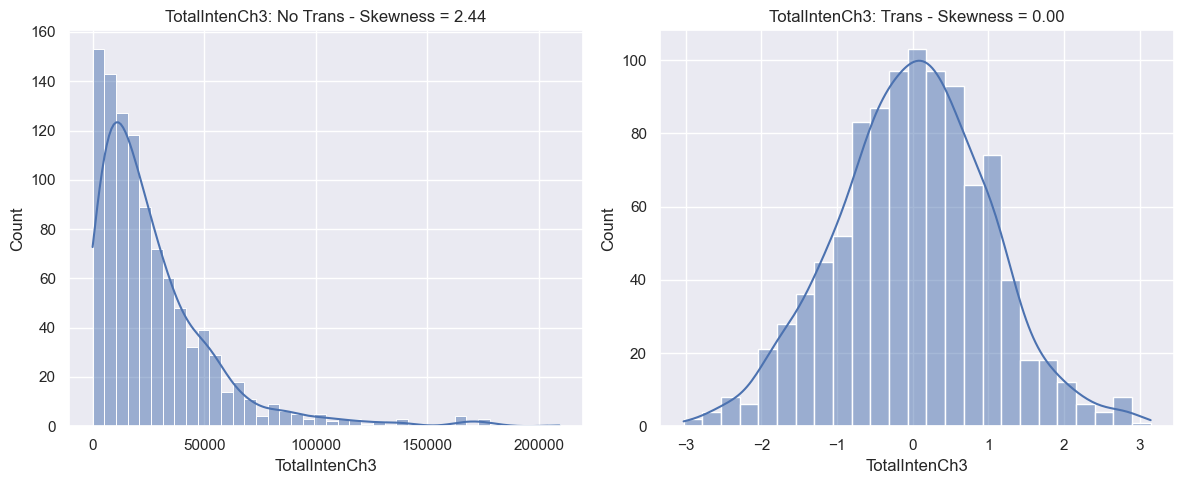

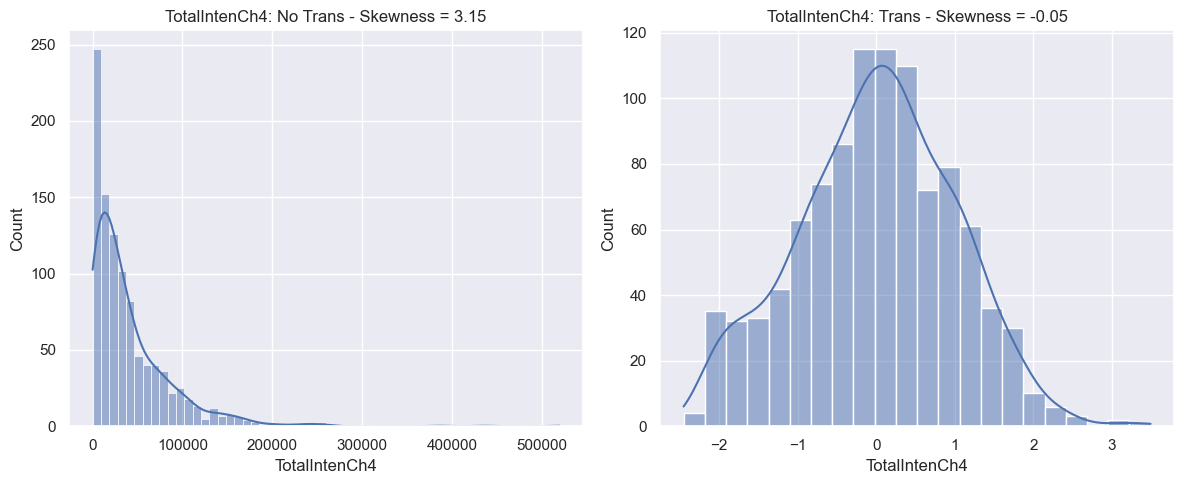

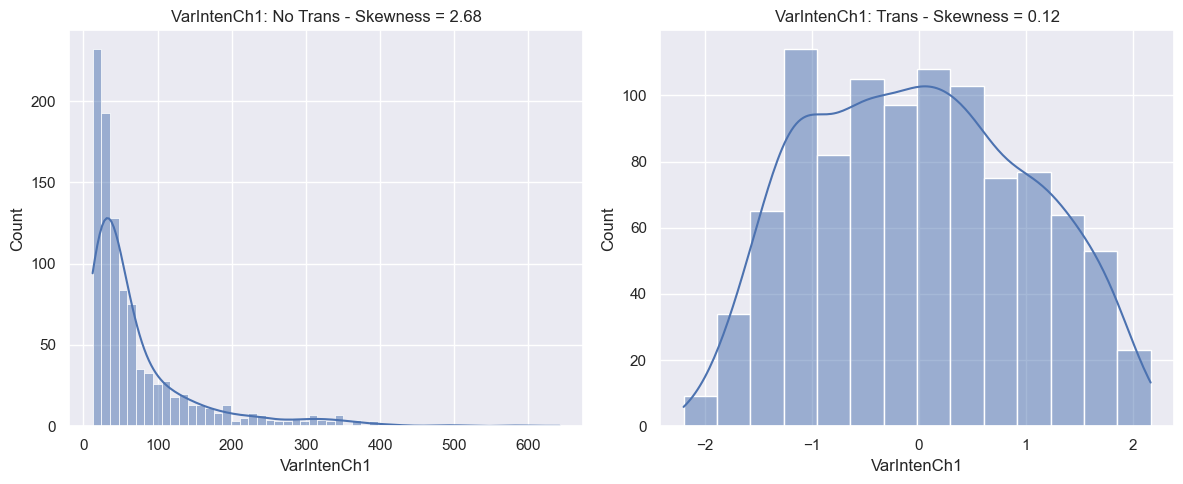

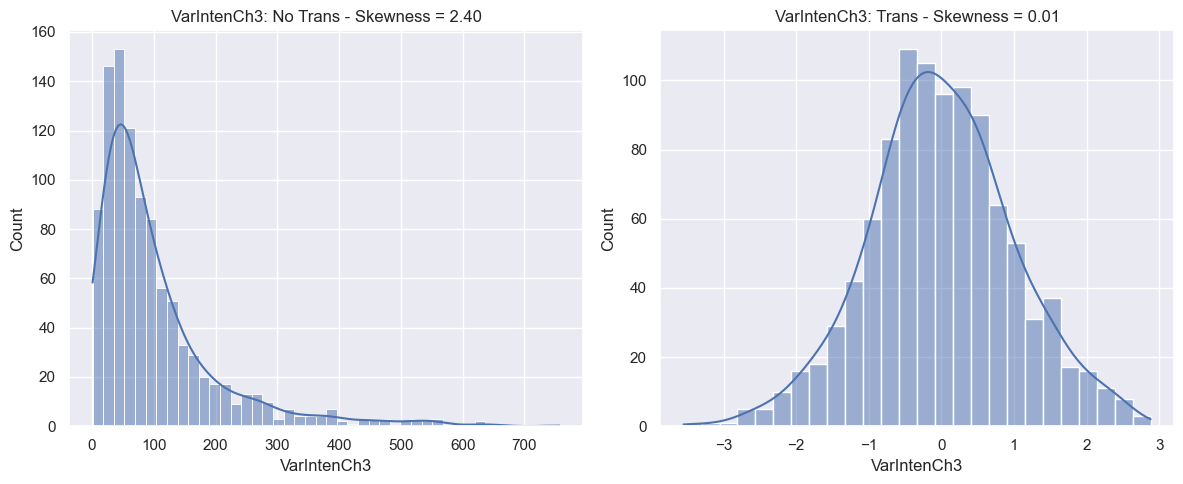

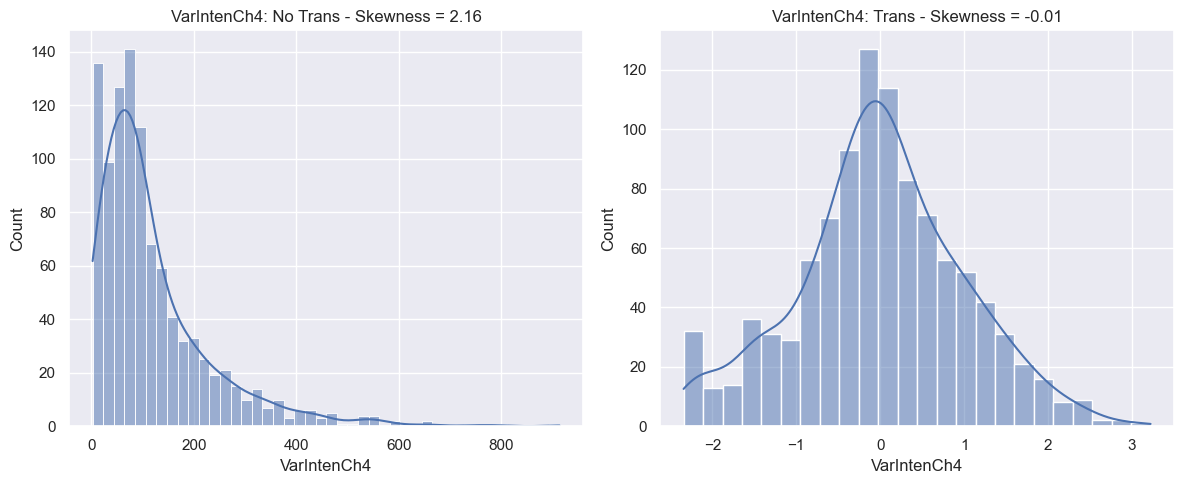

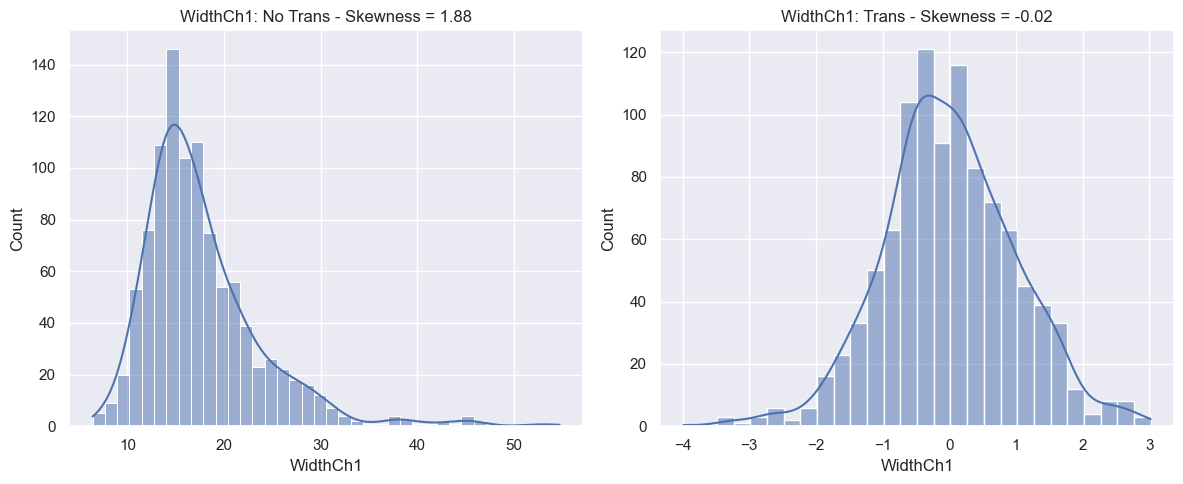

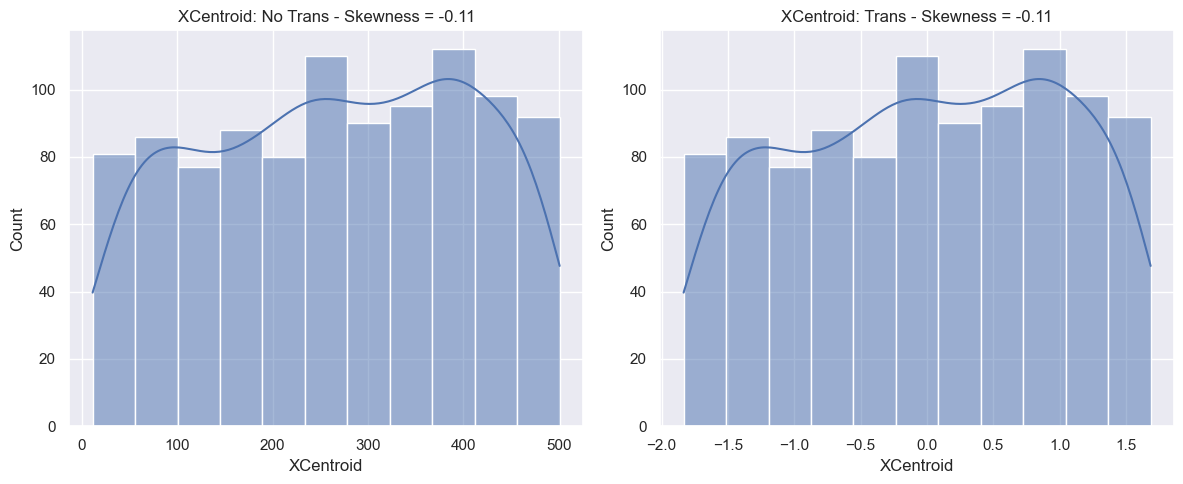

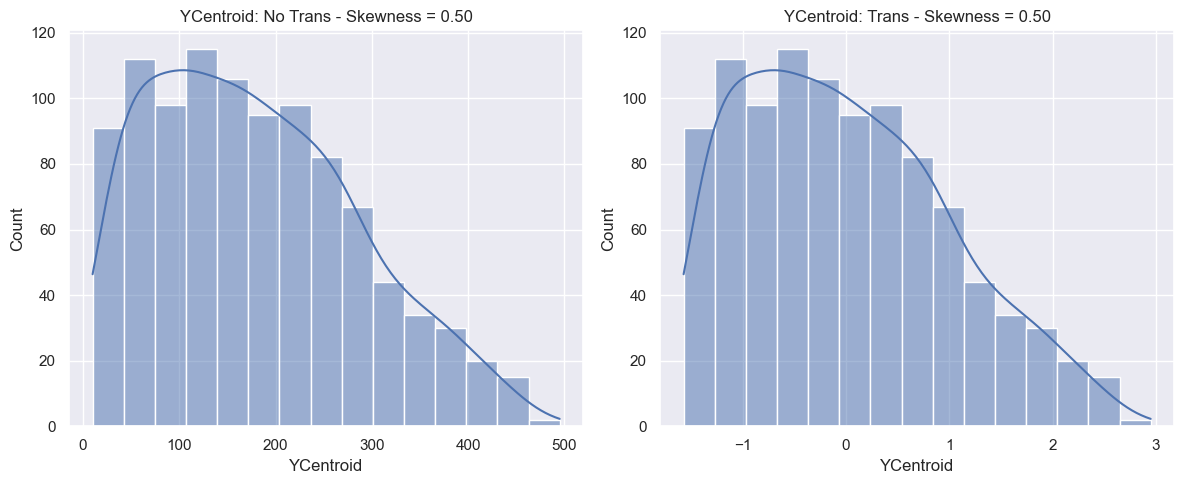

In [62]:
for col in train_df.columns:

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original
    sns.histplot(train_df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"{col}: No Trans - Skewness = {skew(train_df[col], bias=True):.2f}")
    
    # Transformed
    sns.histplot(train_df_trans[col], kde=True, ax=axes[1])
    axes[1].set_title(f"{col}: Trans - Skewness = {skew(train_df_trans[col], bias=True):.2f}")
    
    plt.tight_layout()
    plt.show()

### PCA